In [1]:
#To do lambdaの外部入力
using Plots
using LinearAlgebra
using Revise
using Optim
#using FFTW
using Zygote
using Nevanlinna
using LaTeXStrings
using MultiFloats
using SparseIR
#using DoubleFloats

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423
┌ Info: Precompiling Optim [429524aa-4258-5aef-a3af-852621145aeb]
└ @ Base loading.jl:1423
┌ Info: Precompiling Zygote [e88e6eb3-aa80-5325-afca-941959d7151f]
└ @ Base loading.jl:1423
┌ Info: Precompiling Nevanlinna [0b21cfa8-e591-48a4-a07b-a9d20be7c264]
└ @ Base loading.jl:1423


In [2]:
# Set work data Type
#T = Float64x2
T = BigFloat

BigFloat

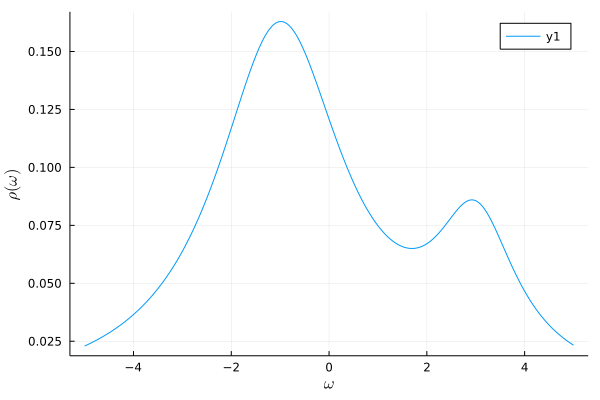

In [3]:
gaussian(x, mu, sigma) = exp(-((x-mu)/sigma)^2)/(sqrt(π)*sigma)
lorentzian(x, mu, gamma) = gamma/(pi*(gamma^2+(x-mu)^2))

#on-centered gaussian 23s
#rho(omega) = gaussian(omega, 0.0, 0.15)  

#on-centered lorentzian 2340s
#rho(omega) = lorentzian(omega, 0.0, 0.15)  

#two peak model 4403s
#rho(omega) = 0.8*gaussian(omega, -1.0, 1.6) + 0.2*gaussian(omega, 3, 1)

rho(omega) = 0.8*lorentzian(omega, -1.0, 1.6) + 0.2*lorentzian(omega, 3, 1)

#three peak model 1255s
#rho(omega) = 0.4*gaussian(omega, 1.0, 0.5) + 
#    0.4*gaussian(omega, 3.0, 0.8) + 0.2*gaussian(omega, -2.0, 1.0) 

# Hubbard gap 2619s
#rho(omega) = 0.5*gaussian(omega, -3.0, 1.0) + 0.5*gaussian(omega, 3.0, 1.0) 

omegas = LinRange(-5, 5, 1000)
#plt.xlabel(L"\omega")
#plt.ylabel(L"\rho(\omega)")
#plt.plot(omegas, rho.(omegas))
plot(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
setprecision(512)
;

In [5]:
beta = 100
wmax = 100
IR_basis_set = FiniteTempBasisSet(Float64(beta), Float64(wmax), 1e-15) #もともと-7
#basis = FiniteTempBasis(fermion, beta, wmax, 1e-7)

rhol = [overlap(IR_basis_set.basis_f.v[l], rho) for l in 1:length(IR_basis_set.basis_f)]
gl = - IR_basis_set.basis_f.s .* big.(rhol)
;

In [6]:
#off-centered delta function
#rhol = (IR_basis_set.basis_f.v(0.2))
#gl = - IR_basis_set.basis_f.s .* rhol
;

In [7]:
gw = evaluate(IR_basis_set.smpl_wn_f, gl)
hnw = length(IR_basis_set.smpl_wn_f.sampling_points)÷2

54

In [8]:
test_gw   = Array{Complex{T}}(undef, hnw) 
test_smpl = Array{Complex{T}}(undef, hnw) 
;

In [9]:
for i in 1:hnw
    test_smpl[i]= im*IR_basis_set.smpl_wn_f.sampling_points[hnw+i]*pi/beta
    test_gw[i]  = gw[hnw+i]
end

In [18]:
N_real    =  1000
omega_max =  100.0
eta       =  0.001
H_max     =  50
ab_coeff  = zeros(ComplexF64, 2*H_max) 
lambda    = 1e-5
iter_tol  = 10000
N_imag    =  Nevanlinna.calc_opt_N_imag(hnw, test_smpl, test_gw)
#N_imag = 38
println("N_imp $(N_imag)")
;

N_imag is setted as 51
N_imp 51


In [19]:
@time sol = Nevanlinna.NevanlinnaSolver(N_imag, test_smpl, test_gw, N_real, omega_max, eta, H_max, iter_tol, lambda, true)
;

Pick matrix is positive semi-definite.
H=1
Iter     Function value   Gradient norm 
     0     9.968690e-05     1.750097e-03
 * time: 0.00026988983154296875
     1     2.062117e-05     2.457431e-04
 * time: 0.8542578220367432
     2     1.821095e-05     5.554684e-05
 * time: 1.276324987411499
     3     1.818808e-05     5.341200e-05
 * time: 1.7097609043121338
     4     1.817644e-05     5.569461e-05
 * time: 1.9526448249816895
     5     1.816413e-05     5.407197e-05
 * time: 2.4408228397369385
     6     1.815626e-05     5.585320e-05
 * time: 2.8033158779144287
     7     1.814213e-05     5.391261e-05
 * time: 3.287848949432373
     8     1.813196e-05     5.579802e-05
 * time: 3.532197952270508
     9     1.811032e-05     5.300701e-05
 * time: 3.9730679988861084
    10     1.809473e-05     5.514132e-05
 * time: 4.2994279861450195
    11     1.805984e-05     5.090101e-05
 * time: 4.700350999832153
    12     1.803563e-05     5.327557e-05
 * time: 4.977402925491333
    13     1.797896e

In [20]:
@time Nevanlinna.solve!(sol)

H=1
Iter     Function value   Gradient norm 
     0     1.690532e-05     6.797453e-09
 * time: 0.0002498626708984375
max_theta=0.0751540400882523894595072064399368741583656630333336897596929164195929414847389497657785969742665951922738566934958839243259097824297678188484729253710950779
hardy optimization was success.
H=2
Iter     Function value   Gradient norm 
     0     1.690532e-05     1.643597e-04
 * time: 0.0002028942108154297
     1     1.599590e-05     1.384374e-04
 * time: 0.7523539066314697
     2     1.542594e-05     8.791129e-05
 * time: 1.38919997215271
     3     1.509959e-05     1.202652e-04
 * time: 1.6427509784698486
     4     1.489611e-05     6.232208e-05
 * time: 2.06441593170166
     5     1.477543e-05     1.096050e-04
 * time: 2.376814126968384
     6     1.468595e-05     7.173350e-05
 * time: 2.831969976425171
     7     1.462975e-05     1.029917e-04
 * time: 3.094852924346924
     8     1.457633e-05     7.422233e-05
 * time: 3.45461106300354
     9     1.454040e-

   115     9.537703e-06     7.007995e-06
 * time: 43.697433948516846
   116     9.537435e-06     5.683981e-06
 * time: 43.957432985305786
   117     9.537207e-06     6.843617e-06
 * time: 44.3148980140686
   118     9.536948e-06     5.685493e-06
 * time: 44.782679080963135
   119     9.536731e-06     6.639054e-06
 * time: 45.13879704475403
   120     9.536477e-06     5.903838e-06
 * time: 45.379806995391846
   121     9.536269e-06     6.696618e-06
 * time: 45.80587911605835
   122     9.536015e-06     6.079163e-06
 * time: 46.31326508522034
   123     9.535809e-06     6.856841e-06
 * time: 46.663902044296265
   124     9.535537e-06     6.196904e-06
 * time: 47.30815601348877
   125     9.535310e-06     6.966497e-06
 * time: 47.68762803077698
   126     9.534968e-06     6.208049e-06
 * time: 48.27049899101257
   127     9.534601e-06     6.891867e-06
 * time: 48.67567801475525
   128     9.533816e-06     5.732599e-06
 * time: 49.146536111831665
   129     9.532313e-06     4.790805e-06
 *

    41     4.673840e-06     3.286794e-05
 * time: 14.967051029205322
    42     4.664010e-06     2.925842e-05
 * time: 15.2633638381958
    43     4.654675e-06     3.224548e-05
 * time: 15.538532972335815
    44     4.645667e-06     2.965834e-05
 * time: 15.903712034225464
    45     4.637012e-06     3.159904e-05
 * time: 16.44998598098755
    46     4.628527e-06     3.032584e-05
 * time: 16.971024990081787
    47     4.620290e-06     3.098302e-05
 * time: 17.49503803253174
    48     4.612170e-06     3.119669e-05
 * time: 18.007166862487793
    49     4.604300e-06     3.037206e-05
 * time: 18.44792890548706
    50     4.596549e-06     3.217262e-05
 * time: 19.09106993675232
    51     4.589044e-06     2.971328e-05
 * time: 19.493155002593994
    52     4.581612e-06     3.319796e-05
 * time: 19.85930585861206
    53     4.574388e-06     2.896289e-05
 * time: 20.343106985092163
    54     4.567183e-06     3.422818e-05
 * time: 20.816993951797485
    55     4.560160e-06     2.917390e-05


   161     2.568575e-06     1.867419e-05
 * time: 62.960816860198975
   162     2.520071e-06     5.728258e-05
 * time: 63.33917593955994
   163     2.487831e-06     2.162457e-05
 * time: 63.77060294151306
   164     2.433218e-06     6.243188e-05
 * time: 64.19331693649292
   165     2.394435e-06     2.560945e-05
 * time: 64.58677196502686
   166     2.334917e-06     6.568248e-05
 * time: 65.03607082366943
   167     2.292001e-06     2.882829e-05
 * time: 65.28842782974243
   168     2.238369e-06     6.135675e-05
 * time: 65.8663330078125
   169     2.198891e-06     2.836742e-05
 * time: 66.25004386901855
   170     2.155038e-06     5.050602e-05
 * time: 66.87363386154175
   171     2.126039e-06     2.444896e-05
 * time: 67.26235699653625
   172     2.097030e-06     3.704461e-05
 * time: 67.72652792930603
   173     2.080614e-06     2.009321e-05
 * time: 68.17276501655579
   174     2.065802e-06     2.344484e-05
 * time: 68.8227059841156
   175     2.058720e-06     1.532817e-05
 * time:

   282     1.932642e-06     1.293462e-05
 * time: 108.37282800674438
   283     1.932257e-06     1.279388e-05
 * time: 108.79916596412659
   284     1.931756e-06     1.279722e-05
 * time: 109.30894494056702
   285     1.931319e-06     1.263314e-05
 * time: 109.63770985603333
   286     1.930706e-06     1.254497e-05
 * time: 110.1146969795227
   287     1.930156e-06     1.235198e-05
 * time: 110.44257187843323
   288     1.929301e-06     1.207919e-05
 * time: 110.94383692741394
   289     1.928499e-06     1.187896e-05
 * time: 111.309250831604
   290     1.927146e-06     1.135954e-05
 * time: 111.7013099193573
   291     1.925853e-06     1.128159e-05
 * time: 112.0107638835907
   292     1.923852e-06     1.080898e-05
 * time: 112.44174599647522
   293     1.921906e-06     1.065199e-05
 * time: 112.72490191459656
   294     1.919428e-06     1.031275e-05
 * time: 113.03967595100403
   295     1.917043e-06     1.016141e-05
 * time: 113.28723287582397
   296     1.914391e-06     9.611220e-0

   402     1.782543e-06     4.068391e-06
 * time: 151.184916973114
   403     1.782346e-06     4.291007e-06
 * time: 151.4906849861145
   404     1.782085e-06     4.066065e-06
 * time: 152.01145887374878
   405     1.781855e-06     4.221857e-06
 * time: 152.38906002044678
   406     1.781549e-06     4.051651e-06
 * time: 152.9084918498993
   407     1.781272e-06     4.147475e-06
 * time: 153.23296999931335
   408     1.780909e-06     4.039504e-06
 * time: 153.5441119670868
   409     1.780570e-06     4.072349e-06
 * time: 153.8162019252777
   410     1.780143e-06     4.021049e-06
 * time: 154.10672402381897
   411     1.779733e-06     3.987344e-06
 * time: 154.39738202095032
   412     1.779245e-06     3.967768e-06
 * time: 154.66778302192688
   413     1.778773e-06     3.873008e-06
 * time: 154.96692991256714
   414     1.778238e-06     3.857899e-06
 * time: 155.36665391921997
   415     1.777721e-06     3.711098e-06
 * time: 155.66911387443542
   416     1.777163e-06     3.685566e-06

    36     1.455124e-06     9.979270e-06
 * time: 15.064297914505005
    37     1.454019e-06     7.689784e-06
 * time: 15.38255786895752
    38     1.453038e-06     9.545302e-06
 * time: 15.675411939620972
    39     1.451951e-06     7.097641e-06
 * time: 15.992596864700317
    40     1.450996e-06     9.556259e-06
 * time: 16.34228491783142
    41     1.450068e-06     6.202320e-06
 * time: 16.659337043762207
    42     1.449335e-06     9.678588e-06
 * time: 16.94267201423645
    43     1.448655e-06     6.548338e-06
 * time: 17.252536058425903
    44     1.448106e-06     9.952090e-06
 * time: 17.567126989364624
    45     1.447480e-06     6.918221e-06
 * time: 17.893779039382935
    46     1.446883e-06     1.049917e-05
 * time: 18.165971994400024
    47     1.446113e-06     7.101797e-06
 * time: 18.471889972686768
    48     1.445347e-06     1.105276e-05
 * time: 18.80623507499695
    49     1.444432e-06     7.391758e-06
 * time: 19.125247955322266
    50     1.443554e-06     1.142394e-

   156     1.263167e-06     2.121716e-05
 * time: 54.50316095352173
   157     1.260044e-06     1.660818e-05
 * time: 54.803020000457764
   158     1.257103e-06     2.140987e-05
 * time: 55.230265855789185
   159     1.254279e-06     1.709011e-05
 * time: 55.58792686462402
   160     1.251645e-06     2.151099e-05
 * time: 55.918606996536255
   161     1.249136e-06     1.743014e-05
 * time: 56.184869050979614
   162     1.246816e-06     2.150004e-05
 * time: 56.47606301307678
   163     1.244624e-06     1.760411e-05
 * time: 56.79974293708801
   164     1.242619e-06     2.136577e-05
 * time: 57.103471994400024
   165     1.240742e-06     1.760499e-05
 * time: 57.37883806228638
   166     1.239046e-06     2.112526e-05
 * time: 57.69591403007507
   167     1.237477e-06     1.744511e-05
 * time: 58.11257290840149
   168     1.236079e-06     2.083387e-05
 * time: 58.45310401916504
   169     1.234799e-06     1.715298e-05
 * time: 58.82839393615723
   170     1.233673e-06     2.057301e-05
 *

   277     1.091390e-06     1.215835e-05
 * time: 97.25530695915222
   278     1.089070e-06     1.831516e-05
 * time: 97.5759789943695
   279     1.086665e-06     1.187947e-05
 * time: 97.90234088897705
   280     1.084304e-06     1.807653e-05
 * time: 98.19956994056702
   281     1.081864e-06     1.158559e-05
 * time: 98.50605392456055
   282     1.079479e-06     1.770653e-05
 * time: 98.84706687927246
   283     1.077021e-06     1.127040e-05
 * time: 99.18780708312988
   284     1.074630e-06     1.721619e-05
 * time: 99.4712929725647
   285     1.072171e-06     1.092949e-05
 * time: 99.77164006233215
   286     1.069794e-06     1.662606e-05
 * time: 100.08624696731567
   287     1.067355e-06     1.056074e-05
 * time: 100.42585802078247
   288     1.065010e-06     1.596517e-05
 * time: 100.71960401535034
   289     1.062609e-06     1.045777e-05
 * time: 101.03271698951721
   290     1.060315e-06     1.526959e-05
 * time: 101.37882089614868
   291     1.057973e-06     1.045545e-05
 * t

   397     8.015906e-07     7.053612e-06
 * time: 136.1866328716278
   398     7.992879e-07     8.775232e-06
 * time: 136.5146849155426
   399     7.969200e-07     6.474853e-06
 * time: 136.85426688194275
   400     7.953874e-07     4.579473e-06
 * time: 137.15263390541077
   401     7.934527e-07     5.451245e-06
 * time: 137.6397099494934
   402     7.919989e-07     4.184602e-06
 * time: 137.97109293937683
   403     7.903761e-07     4.223795e-06
 * time: 138.4029779434204
   404     7.892067e-07     5.477983e-06
 * time: 138.71416997909546
   405     7.877646e-07     3.995314e-06
 * time: 139.22784185409546
   406     7.866752e-07     4.289953e-06
 * time: 139.57577991485596
   407     7.855950e-07     5.270716e-06
 * time: 140.01302194595337
   408     7.848066e-07     3.131148e-06
 * time: 140.33728194236755
   409     7.837774e-07     7.091360e-06
 * time: 140.81167006492615
   410     7.829116e-07     3.278153e-06
 * time: 141.08194398880005
   411     7.818995e-07     6.403150e-

   517     7.525769e-07     2.028878e-06
 * time: 176.68338298797607
   518     7.524655e-07     1.073949e-06
 * time: 176.98356294631958
   519     7.523541e-07     2.077368e-06
 * time: 177.28609108924866
   520     7.522573e-07     9.556215e-07
 * time: 177.6035599708557
   521     7.521605e-07     2.092087e-06
 * time: 177.94746208190918
   522     7.520773e-07     9.634651e-07
 * time: 178.21866106987
   523     7.519937e-07     2.069715e-06
 * time: 178.53221487998962
   524     7.519227e-07     9.773005e-07
 * time: 178.84596490859985
   525     7.518509e-07     2.017342e-06
 * time: 179.17222595214844
   526     7.517905e-07     1.177862e-06
 * time: 179.440691947937
   527     7.517287e-07     1.952023e-06
 * time: 179.7554349899292
   528     7.516771e-07     1.352125e-06
 * time: 180.10586595535278
   529     7.516234e-07     1.893901e-06
 * time: 180.4171280860901
   530     7.515788e-07     1.507052e-06
 * time: 180.69539594650269
   531     7.515312e-07     1.856837e-06
 

   637     7.482470e-07     2.166092e-06
 * time: 218.23847889900208
   638     7.482330e-07     1.177865e-06
 * time: 218.51927304267883
   639     7.482169e-07     2.153442e-06
 * time: 218.853777885437
   640     7.482032e-07     1.203123e-06
 * time: 219.16576886177063
   641     7.481872e-07     2.122149e-06
 * time: 219.6091070175171
   642     7.481739e-07     1.205166e-06
 * time: 219.9322578907013
   643     7.481577e-07     2.079922e-06
 * time: 220.39284491539001
   644     7.481448e-07     1.190819e-06
 * time: 220.67492985725403
   645     7.481285e-07     2.031064e-06
 * time: 221.15972089767456
   646     7.481164e-07     1.172785e-06
 * time: 221.47051000595093
   647     7.481002e-07     1.973961e-06
 * time: 221.9210638999939
   648     7.480894e-07     1.158238e-06
 * time: 222.2497169971466
   649     7.480710e-07     1.997363e-06
 * time: 222.73372387886047
   650     7.480593e-07     1.133168e-06
 * time: 223.04577493667603
   651     7.480207e-07     2.399735e-06

   757     7.427606e-07     2.108241e-06
 * time: 257.99330592155457
   758     7.427224e-07     2.768918e-06
 * time: 258.2653660774231
   759     7.426845e-07     2.155756e-06
 * time: 258.5807468891144
   760     7.426467e-07     2.831240e-06
 * time: 258.9276020526886
   761     7.426092e-07     2.201024e-06
 * time: 259.2334358692169
   762     7.425719e-07     2.887591e-06
 * time: 259.50969886779785
   763     7.425348e-07     2.243705e-06
 * time: 259.84215807914734
   764     7.424979e-07     2.938602e-06
 * time: 260.158499956131
   765     7.424612e-07     2.283669e-06
 * time: 260.46541595458984
   766     7.424246e-07     2.984787e-06
 * time: 260.7499520778656
   767     7.423882e-07     2.320909e-06
 * time: 261.07664799690247
   768     7.423518e-07     3.026507e-06
 * time: 261.3904049396515
   769     7.423157e-07     2.355475e-06
 * time: 261.7018780708313
   770     7.422797e-07     3.063975e-06
 * time: 261.99939703941345
   771     7.422438e-07     2.387422e-06
 *

   877     7.395234e-07     2.821225e-06
 * time: 295.7579228878021
   878     7.394966e-07     2.689642e-06
 * time: 296.07481503486633
   879     7.394697e-07     2.835609e-06
 * time: 296.3913459777832
   880     7.394426e-07     2.700972e-06
 * time: 296.72770500183105
   881     7.394153e-07     2.849961e-06
 * time: 297.0095100402832
   882     7.393879e-07     2.712153e-06
 * time: 297.3215548992157
   883     7.393602e-07     2.864294e-06
 * time: 297.6615459918976
   884     7.393323e-07     2.723193e-06
 * time: 297.973788022995
   885     7.393043e-07     2.878603e-06
 * time: 298.26405596733093
   886     7.392762e-07     2.734118e-06
 * time: 298.5924689769745
   887     7.392479e-07     2.892875e-06
 * time: 298.92471289634705
   888     7.392194e-07     2.744963e-06
 * time: 299.23254585266113
   889     7.391908e-07     2.907077e-06
 * time: 299.5122079849243
   890     7.391621e-07     2.755774e-06
 * time: 299.8415460586548
   891     7.391333e-07     2.921165e-06
 * 

   997     7.367739e-07     3.202059e-06
 * time: 334.09928798675537
   998     7.367574e-07     3.151359e-06
 * time: 334.4322998523712
   999     7.367409e-07     3.208030e-06
 * time: 334.74850487709045
  1000     7.367244e-07     3.155643e-06
 * time: 335.05735993385315
  1001     7.367079e-07     3.214945e-06
 * time: 335.40814995765686
  1002     7.366915e-07     3.160938e-06
 * time: 335.716814994812
  1003     7.366751e-07     3.222902e-06
 * time: 336.04326605796814
  1004     7.366586e-07     3.167368e-06
 * time: 336.34610891342163
  1005     7.366422e-07     3.231965e-06
 * time: 336.66417503356934
  1006     7.366259e-07     3.175020e-06
 * time: 336.9826030731201
  1007     7.366095e-07     3.242158e-06
 * time: 337.28919196128845
  1008     7.365931e-07     3.183932e-06
 * time: 337.7281448841095
  1009     7.365768e-07     3.253455e-06
 * time: 338.02742099761963
  1010     7.365604e-07     3.194094e-06
 * time: 338.33734607696533
  1011     7.365441e-07     3.265780e-0

  1117     7.348224e-07     3.247061e-06
 * time: 372.83542704582214
  1118     7.348081e-07     3.275206e-06
 * time: 373.1697380542755
  1119     7.347938e-07     3.238542e-06
 * time: 373.4219720363617
  1120     7.347796e-07     3.268015e-06
 * time: 373.78468203544617
  1121     7.347653e-07     3.229906e-06
 * time: 374.0968220233917
  1122     7.347511e-07     3.260653e-06
 * time: 374.416512966156
  1123     7.347368e-07     3.221076e-06
 * time: 374.68103408813477
  1124     7.347226e-07     3.253041e-06
 * time: 375.01216101646423
  1125     7.347084e-07     3.211989e-06
 * time: 375.3538420200348
  1126     7.346942e-07     3.245114e-06
 * time: 375.66146993637085
  1127     7.346800e-07     3.202594e-06
 * time: 375.9650619029999
  1128     7.346658e-07     3.236821e-06
 * time: 376.28455805778503
  1129     7.346516e-07     3.192856e-06
 * time: 376.62915992736816
  1130     7.346375e-07     3.228132e-06
 * time: 376.9642539024353
  1131     7.346233e-07     3.182760e-06
 

  1237     7.333575e-07     2.545572e-06
 * time: 416.02122807502747
  1238     7.333479e-07     2.487523e-06
 * time: 416.4296610355377
  1239     7.333383e-07     2.537784e-06
 * time: 416.89867901802063
  1240     7.333287e-07     2.472587e-06
 * time: 417.2914469242096
  1241     7.333192e-07     2.530315e-06
 * time: 417.5670759677887
  1242     7.333096e-07     2.457816e-06
 * time: 417.89717388153076
  1243     7.333001e-07     2.523158e-06
 * time: 418.20039105415344
  1244     7.332905e-07     2.443221e-06
 * time: 418.506422996521
  1245     7.332810e-07     2.516299e-06
 * time: 418.7788178920746
  1246     7.332715e-07     2.428809e-06
 * time: 419.0910439491272
  1247     7.332620e-07     2.509719e-06
 * time: 419.3914430141449
  1248     7.332525e-07     2.414581e-06
 * time: 419.7010190486908
  1249     7.332430e-07     2.503396e-06
 * time: 419.9865560531616
  1250     7.332336e-07     2.400535e-06
 * time: 420.27718687057495
  1251     7.332241e-07     2.497306e-06
 * 

  1357     7.321714e-07     1.946635e-06
 * time: 456.9412040710449
  1358     7.321612e-07     1.639601e-06
 * time: 457.34658789634705
  1359     7.321510e-07     1.933561e-06
 * time: 457.70158886909485
  1360     7.321408e-07     1.624609e-06
 * time: 457.9951379299164
  1361     7.321305e-07     1.920563e-06
 * time: 458.28373408317566
  1362     7.321203e-07     1.609651e-06
 * time: 458.5851020812988
  1363     7.321101e-07     1.907641e-06
 * time: 458.9030079841614
  1364     7.320999e-07     1.594727e-06
 * time: 459.1903259754181
  1365     7.320897e-07     1.894790e-06
 * time: 459.483274936676
  1366     7.320795e-07     1.579839e-06
 * time: 459.7942509651184
  1367     7.320693e-07     1.882006e-06
 * time: 460.15992307662964
  1368     7.320592e-07     1.564987e-06
 * time: 460.43647289276123
  1369     7.320490e-07     1.869284e-06
 * time: 460.7415590286255
  1370     7.320388e-07     1.550173e-06
 * time: 461.0481309890747
  1371     7.320286e-07     1.856619e-06
 * 

  1477     7.310663e-07     1.184014e-06
 * time: 498.6221299171448
  1478     7.310586e-07     7.860921e-07
 * time: 498.97327303886414
  1479     7.310509e-07     1.172067e-06
 * time: 499.2681450843811
  1480     7.310432e-07     7.727129e-07
 * time: 499.59586000442505
  1481     7.310355e-07     1.160260e-06
 * time: 499.9754538536072
  1482     7.310278e-07     7.593866e-07
 * time: 500.3143630027771
  1483     7.310202e-07     1.148601e-06
 * time: 500.5978419780731
  1484     7.310126e-07     7.461137e-07
 * time: 500.98560190200806
  1485     7.310050e-07     1.137099e-06
 * time: 501.4355540275574
  1486     7.309974e-07     7.328943e-07
 * time: 501.77166199684143
  1487     7.309899e-07     1.125762e-06
 * time: 502.0663459300995
  1488     7.309823e-07     7.197286e-07
 * time: 502.39847588539124
  1489     7.309748e-07     1.114596e-06
 * time: 502.74551796913147
  1490     7.309673e-07     7.066162e-07
 * time: 503.09512305259705
  1491     7.309598e-07     1.103610e-06


  1598     7.301921e-07     5.325254e-07
 * time: 551.2477178573608
  1599     7.301851e-07     7.720919e-07
 * time: 551.7749519348145
  1600     7.301781e-07     5.365454e-07
 * time: 552.1842019557953
  1601     7.301710e-07     7.705888e-07
 * time: 552.6071100234985
  1602     7.301641e-07     5.405088e-07
 * time: 552.9336910247803
  1603     7.301571e-07     7.693503e-07
 * time: 553.4956700801849
  1604     7.301501e-07     5.444140e-07
 * time: 554.0908660888672
  1605     7.301431e-07     7.683810e-07
 * time: 554.472414970398
  1606     7.301361e-07     5.482597e-07
 * time: 554.8358700275421
  1607     7.301291e-07     7.676845e-07
 * time: 555.2020928859711
  1608     7.301221e-07     5.520444e-07
 * time: 555.6730089187622
  1609     7.301151e-07     7.672631e-07
 * time: 556.1626880168915
  1610     7.301082e-07     5.557669e-07
 * time: 556.4795680046082
  1611     7.301012e-07     7.671179e-07
 * time: 556.9590408802032
  1612     7.300942e-07     5.594262e-07
 * time:

  1719     7.293899e-07     9.375057e-07
 * time: 610.8079929351807
  1720     7.293839e-07     7.683230e-07
 * time: 611.2137448787689
  1721     7.293780e-07     9.400614e-07
 * time: 611.6099359989166
  1722     7.293720e-07     7.732552e-07
 * time: 612.0773799419403
  1723     7.293661e-07     9.425751e-07
 * time: 612.427572965622
  1724     7.293602e-07     7.781453e-07
 * time: 612.7764539718628
  1725     7.293543e-07     9.450537e-07
 * time: 613.0637130737305
  1726     7.293485e-07     7.829971e-07
 * time: 613.3950800895691
  1727     7.293426e-07     9.475043e-07
 * time: 613.712653875351
  1728     7.293368e-07     7.878143e-07
 * time: 614.0737280845642
  1729     7.293310e-07     9.499346e-07
 * time: 614.3887128829956
  1730     7.293252e-07     7.926006e-07
 * time: 614.7410099506378
  1731     7.293194e-07     9.523523e-07
 * time: 615.073734998703
  1732     7.293137e-07     7.973595e-07
 * time: 615.425076007843
  1733     7.293079e-07     9.547655e-07
 * time: 61

  1840     7.287827e-07     1.261283e-06
 * time: 656.5190999507904
  1841     7.287784e-07     1.211230e-06
 * time: 656.9682340621948
  1842     7.287741e-07     1.268158e-06
 * time: 657.3908529281616
  1843     7.287697e-07     1.217486e-06
 * time: 657.8194320201874
  1844     7.287654e-07     1.274919e-06
 * time: 658.1450729370117
  1845     7.287611e-07     1.223705e-06
 * time: 658.5218439102173
  1846     7.287568e-07     1.281569e-06
 * time: 659.1408190727234
  1847     7.287525e-07     1.229883e-06
 * time: 659.6827440261841
  1848     7.287482e-07     1.288110e-06
 * time: 660.3248569965363
  1849     7.287439e-07     1.236019e-06
 * time: 660.9286708831787
  1850     7.287396e-07     1.294544e-06
 * time: 661.3873760700226
  1851     7.287353e-07     1.242113e-06
 * time: 661.9858109951019
  1852     7.287310e-07     1.300874e-06
 * time: 662.5031189918518
  1853     7.287268e-07     1.248162e-06
 * time: 663.2732319831848
  1854     7.287225e-07     1.307103e-06
 * time

  1961     7.282842e-07     1.494902e-06
 * time: 710.6256308555603
  1962     7.282803e-07     1.495904e-06
 * time: 710.9924230575562
  1963     7.282764e-07     1.496470e-06
 * time: 711.3849010467529
  1964     7.282725e-07     1.495551e-06
 * time: 711.768639087677
  1965     7.282686e-07     1.497875e-06
 * time: 712.2858200073242
  1966     7.282647e-07     1.495044e-06
 * time: 712.7542409896851
  1967     7.282608e-07     1.499118e-06
 * time: 713.0982449054718
  1968     7.282569e-07     1.494385e-06
 * time: 713.4991669654846
  1969     7.282530e-07     1.500200e-06
 * time: 713.9038488864899
  1970     7.282492e-07     1.493578e-06
 * time: 714.3082039356232
  1971     7.282453e-07     1.501123e-06
 * time: 714.7018799781799
  1972     7.282415e-07     1.492629e-06
 * time: 715.1383609771729
  1973     7.282376e-07     1.501890e-06
 * time: 715.5988039970398
  1974     7.282338e-07     1.491541e-06
 * time: 716.0741438865662
  1975     7.282299e-07     1.502504e-06
 * time:

  2082     7.260241e-07     5.147553e-07
 * time: 762.1632208824158
  2083     7.260081e-07     7.801404e-07
 * time: 762.5563659667969
  2084     7.259767e-07     8.780833e-07
 * time: 763.2822408676147
  2085     7.259489e-07     5.934545e-07
 * time: 763.7324829101562
  2086     7.259149e-07     1.109188e-06
 * time: 764.2063229084015
  2087     7.258857e-07     3.709774e-07
 * time: 764.957377910614
  2088     7.258575e-07     1.000572e-06
 * time: 765.484955072403
  2089     7.258352e-07     2.903944e-07
 * time: 765.969358921051
  2090     7.258149e-07     8.186859e-07
 * time: 766.4747910499573
  2091     7.257986e-07     2.504412e-07
 * time: 767.0409069061279
  2092     7.257821e-07     7.599618e-07
 * time: 767.5439050197601
  2093     7.257682e-07     2.114224e-07
 * time: 768.0775029659271
  2094     7.257537e-07     7.399485e-07
 * time: 768.6034409999847
  2095     7.257409e-07     2.318818e-07
 * time: 769.0568430423737
  2096     7.257272e-07     6.970615e-07
 * time: 7

  2203     7.254412e-07     3.656445e-08
 * time: 809.4316580295563
  2204     7.254411e-07     2.460037e-08
 * time: 809.8165309429169
  2205     7.254411e-07     3.590847e-08
 * time: 810.4965598583221
  2206     7.254410e-07     2.537855e-08
 * time: 811.2779710292816
  2207     7.254409e-07     3.526866e-08
 * time: 811.8007099628448
  2208     7.254408e-07     2.621622e-08
 * time: 812.2701818943024
  2209     7.254407e-07     3.476203e-08
 * time: 812.7707839012146
  2210     7.254407e-07     2.708231e-08
 * time: 813.2297239303589
  2211     7.254406e-07     3.441780e-08
 * time: 813.6239190101624
  2212     7.254405e-07     2.793219e-08
 * time: 814.0337309837341
  2213     7.254404e-07     3.419674e-08
 * time: 814.4086339473724
  2214     7.254404e-07     2.871205e-08
 * time: 814.7993469238281
  2215     7.254403e-07     3.402475e-08
 * time: 815.1537990570068
  2216     7.254402e-07     2.936908e-08
 * time: 815.4686160087585
  2217     7.254402e-07     3.382526e-08
 * time

  2324     7.254383e-07     1.310659e-08
 * time: 854.1959159374237
  2325     7.254383e-07     1.083820e-08
 * time: 854.5792009830475
  2326     7.254383e-07     1.288371e-08
 * time: 854.8586399555206
  2327     7.254383e-07     1.039244e-08
 * time: 855.1800229549408
  2328     7.254383e-07     1.266169e-08
 * time: 855.4861350059509
  2329     7.254383e-07     1.000119e-08
 * time: 855.9453859329224
  2330     7.254383e-07     1.243757e-08
 * time: 856.3138799667358
  2331     7.254383e-07     9.661222e-09
 * time: 856.6724610328674
max_theta=0.13738577407232987274010456650453251725646632655606954008241818200465853566536017315712999000724105695036157475650448833003109941838658219394154212858595463
hardy optimization was success.
H=5
Iter     Function value   Gradient norm 
     0     7.254383e-07     1.008863e-05
 * time: 0.00028586387634277344
     1     7.101078e-07     2.777224e-05
 * time: 0.9429149627685547
     2     7.043361e-07     5.715918e-06
 * time: 1.470944881439209
 

   109     5.968618e-07     4.728699e-06
 * time: 50.630748987197876
   110     5.966228e-07     3.646170e-06
 * time: 50.993947982788086
   111     5.963832e-07     4.743189e-06
 * time: 51.33986496925354
   112     5.961490e-07     3.559700e-06
 * time: 51.722235918045044
   113     5.959147e-07     4.752127e-06
 * time: 52.07242393493652
   114     5.956859e-07     3.471640e-06
 * time: 52.376025915145874
   115     5.954575e-07     4.756141e-06
 * time: 52.75011992454529
   116     5.952348e-07     3.385129e-06
 * time: 53.11107897758484
   117     5.950127e-07     4.755464e-06
 * time: 53.608253955841064
   118     5.947962e-07     3.302275e-06
 * time: 54.103276014328
   119     5.945806e-07     4.750182e-06
 * time: 54.48095083236694
   120     5.943707e-07     3.223856e-06
 * time: 54.90778303146362
   121     5.941617e-07     4.740484e-06
 * time: 55.32014298439026
   122     5.939585e-07     3.149514e-06
 * time: 55.69021701812744
   123     5.937562e-07     4.726800e-06
 * t

   230     5.830629e-07     2.149849e-06
 * time: 96.68742299079895
   231     5.829624e-07     2.544650e-06
 * time: 97.05476903915405
   232     5.828702e-07     2.047261e-06
 * time: 97.43015789985657
   233     5.827832e-07     2.391768e-06
 * time: 97.73669695854187
   234     5.827047e-07     1.952209e-06
 * time: 98.06989789009094
   235     5.826317e-07     2.242746e-06
 * time: 98.4303948879242
   236     5.825669e-07     1.915740e-06
 * time: 98.82796502113342
   237     5.825073e-07     2.102285e-06
 * time: 99.35450100898743
   238     5.824550e-07     1.903184e-06
 * time: 99.82983994483948
   239     5.824072e-07     1.974232e-06
 * time: 100.13699984550476
   240     5.823654e-07     1.890177e-06
 * time: 100.49294185638428
   241     5.823269e-07     1.861013e-06
 * time: 101.06094694137573
   242     5.822931e-07     1.878954e-06
 * time: 101.50798487663269
   243     5.822613e-07     1.829580e-06
 * time: 101.96030902862549
   244     5.822327e-07     1.871428e-06
 * 

   350     5.760627e-07     4.259798e-06
 * time: 145.58882403373718
   351     5.760231e-07     2.685700e-06
 * time: 146.0618839263916
   352     5.759851e-07     4.225490e-06
 * time: 146.56454396247864
   353     5.759447e-07     2.648005e-06
 * time: 147.16526293754578
   354     5.759058e-07     4.187340e-06
 * time: 147.84322500228882
   355     5.758644e-07     2.608813e-06
 * time: 148.3339478969574
   356     5.758246e-07     4.145431e-06
 * time: 148.7882640361786
   357     5.757821e-07     2.569984e-06
 * time: 149.27382397651672
   358     5.757413e-07     4.099732e-06
 * time: 149.67494201660156
   359     5.756976e-07     2.533054e-06
 * time: 150.13626790046692
   360     5.756558e-07     4.050170e-06
 * time: 150.4634928703308
   361     5.756111e-07     2.499139e-06
 * time: 150.8125159740448
   362     5.755683e-07     3.996692e-06
 * time: 151.17016887664795
   363     5.755226e-07     2.468907e-06
 * time: 151.52858686447144
   364     5.754791e-07     3.939314e-0

   470     5.682957e-07     3.100555e-06
 * time: 193.72374892234802
   471     5.682571e-07     3.481728e-06
 * time: 194.23038697242737
   472     5.682266e-07     3.391908e-06
 * time: 194.5858428478241
   473     5.681758e-07     3.502996e-06
 * time: 195.3085629940033
   474     5.681354e-07     3.571276e-06
 * time: 195.80266189575195
   475     5.680676e-07     3.373093e-06
 * time: 196.3039219379425
   476     5.680139e-07     3.568814e-06
 * time: 196.71222496032715
   477     5.679259e-07     3.057990e-06
 * time: 197.2076449394226
   478     5.678568e-07     3.328103e-06
 * time: 197.5619719028473
   479     5.677473e-07     2.588440e-06
 * time: 198.13150787353516
   480     5.676603e-07     2.853215e-06
 * time: 198.44209098815918
   481     5.675302e-07     2.405001e-06
 * time: 198.948814868927
   482     5.674237e-07     2.659708e-06
 * time: 199.27974104881287
   483     5.672806e-07     2.409346e-06
 * time: 199.9259250164032
   484     5.671611e-07     2.617140e-06
 

   590     5.535961e-07     2.006495e-06
 * time: 242.2873809337616
   591     5.534309e-07     2.724176e-06
 * time: 242.68540596961975
   592     5.532731e-07     2.193713e-06
 * time: 243.09719491004944
   593     5.531118e-07     2.906255e-06
 * time: 243.42990684509277
   594     5.529554e-07     2.403846e-06
 * time: 243.787122964859
   595     5.527943e-07     3.006144e-06
 * time: 244.237646818161
   596     5.526378e-07     2.540869e-06
 * time: 244.56703090667725
   597     5.524775e-07     3.019944e-06
 * time: 244.9652018547058
   598     5.523226e-07     2.608807e-06
 * time: 245.82530689239502
   599     5.521652e-07     2.964992e-06
 * time: 246.2363748550415
   600     5.520142e-07     2.626972e-06
 * time: 246.8391149044037
   601     5.518620e-07     2.867789e-06
 * time: 247.1821219921112
   602     5.517167e-07     2.619027e-06
 * time: 247.51306104660034
   603     5.515708e-07     2.752582e-06
 * time: 247.87109303474426
   604     5.514321e-07     2.603589e-06
 *

   710     5.431189e-07     1.807677e-06
 * time: 291.0437228679657
   711     5.430730e-07     1.877673e-06
 * time: 291.5292139053345
   712     5.430279e-07     1.808021e-06
 * time: 291.9183328151703
   713     5.429829e-07     1.872892e-06
 * time: 292.2777018547058
   714     5.429385e-07     1.810679e-06
 * time: 292.6502959728241
   715     5.428942e-07     1.869717e-06
 * time: 293.05953097343445
   716     5.428503e-07     1.815127e-06
 * time: 293.3950140476227
   717     5.428063e-07     1.867860e-06
 * time: 293.87381386756897
   718     5.427627e-07     1.820683e-06
 * time: 294.54439783096313
   719     5.427189e-07     1.866905e-06
 * time: 295.65911197662354
   720     5.426753e-07     1.826645e-06
 * time: 296.1857399940491
   721     5.426314e-07     1.866403e-06
 * time: 296.7997159957886
   722     5.425875e-07     1.832409e-06
 * time: 297.2829899787903
   723     5.425433e-07     1.865970e-06
 * time: 298.00092697143555
   724     5.424991e-07     1.837562e-06
 *

   830     5.373871e-07     3.097862e-06
 * time: 345.0842089653015
   831     5.373404e-07     2.837361e-06
 * time: 345.42619585990906
   832     5.372937e-07     3.133333e-06
 * time: 345.79133892059326
   833     5.372468e-07     2.873103e-06
 * time: 346.1270968914032
   834     5.372000e-07     3.168600e-06
 * time: 346.52926993370056
   835     5.371529e-07     2.908612e-06
 * time: 346.9855799674988
   836     5.371060e-07     3.203594e-06
 * time: 347.3517048358917
   837     5.370588e-07     2.943846e-06
 * time: 347.7559030056
   838     5.370117e-07     3.238279e-06
 * time: 348.1090178489685
   839     5.369644e-07     2.978792e-06
 * time: 348.41199803352356
   840     5.369172e-07     3.272655e-06
 * time: 348.75305104255676
   841     5.368698e-07     3.013468e-06
 * time: 349.0937418937683
   842     5.368225e-07     3.306746e-06
 * time: 349.4458990097046
   843     5.367750e-07     3.047906e-06
 * time: 349.797709941864
   844     5.367277e-07     3.340596e-06
 * tim

   950     5.311967e-07     4.408082e-06
 * time: 387.0144999027252
   951     5.311354e-07     4.055918e-06
 * time: 387.4147980213165
   952     5.310743e-07     4.414398e-06
 * time: 387.7281289100647
   953     5.310128e-07     4.061019e-06
 * time: 388.0445590019226
   954     5.309517e-07     4.420117e-06
 * time: 388.57785081863403
   955     5.308900e-07     4.065582e-06
 * time: 388.95781087875366
   956     5.308286e-07     4.425271e-06
 * time: 389.2904198169708
   957     5.307668e-07     4.069625e-06
 * time: 389.6513409614563
   958     5.307053e-07     4.429880e-06
 * time: 390.0624279975891
   959     5.306434e-07     4.073156e-06
 * time: 390.37982988357544
   960     5.305817e-07     4.433955e-06
 * time: 390.69728088378906
   961     5.305197e-07     4.076171e-06
 * time: 391.0482568740845
   962     5.304579e-07     4.437488e-06
 * time: 391.3848948478699
   963     5.303957e-07     4.078650e-06
 * time: 391.7457230091095
   964     5.303339e-07     4.440460e-06
 * 

  1070     5.234461e-07     4.108489e-06
 * time: 431.1477780342102
  1071     5.233793e-07     3.730683e-06
 * time: 431.5540909767151
  1072     5.233131e-07     4.099845e-06
 * time: 431.8722779750824
  1073     5.232464e-07     3.722105e-06
 * time: 432.22312903404236
  1074     5.231803e-07     4.091146e-06
 * time: 432.6774649620056
  1075     5.231138e-07     3.713497e-06
 * time: 433.1948199272156
  1076     5.230479e-07     4.082411e-06
 * time: 433.690456867218
  1077     5.229815e-07     3.704884e-06
 * time: 434.01736283302307
  1078     5.229157e-07     4.073666e-06
 * time: 434.36711597442627
  1079     5.228495e-07     3.696297e-06
 * time: 434.7040379047394
  1080     5.227838e-07     4.064945e-06
 * time: 435.42575693130493
  1081     5.227177e-07     3.687772e-06
 * time: 435.77504897117615
  1082     5.226522e-07     4.056288e-06
 * time: 436.21633195877075
  1083     5.225863e-07     3.679352e-06
 * time: 436.58866786956787
  1084     5.225210e-07     4.047743e-06
 

  1190     5.159418e-07     3.864399e-06
 * time: 482.68685603141785
  1191     5.158832e-07     3.477604e-06
 * time: 483.1046919822693
  1192     5.158253e-07     3.859601e-06
 * time: 483.64314889907837
  1193     5.157669e-07     3.473653e-06
 * time: 484.06285285949707
  1194     5.157092e-07     3.854761e-06
 * time: 484.53510904312134
  1195     5.156511e-07     3.469768e-06
 * time: 484.88934898376465
  1196     5.155936e-07     3.849894e-06
 * time: 485.2365038394928
  1197     5.155358e-07     3.465962e-06
 * time: 485.6418888568878
  1198     5.154785e-07     3.845015e-06
 * time: 485.99958086013794
  1199     5.154209e-07     3.462249e-06
 * time: 486.3485748767853
  1200     5.153640e-07     3.840138e-06
 * time: 486.7545449733734
  1201     5.153066e-07     3.458641e-06
 * time: 487.22052097320557
  1202     5.152499e-07     3.835280e-06
 * time: 487.5902669429779
  1203     5.151929e-07     3.455151e-06
 * time: 487.98978185653687
  1204     5.151364e-07     3.830456e-06

  1311     5.096453e-07     3.305533e-06
 * time: 534.8475458621979
  1312     5.095979e-07     3.892704e-06
 * time: 535.1895380020142
  1313     5.095502e-07     3.300027e-06
 * time: 535.5758860111237
  1314     5.095029e-07     3.890846e-06
 * time: 535.8862700462341
  1315     5.094554e-07     3.294441e-06
 * time: 536.2336609363556
  1316     5.094083e-07     3.888988e-06
 * time: 536.5930969715118
  1317     5.093608e-07     3.288781e-06
 * time: 537.0113229751587
  1318     5.093139e-07     3.887157e-06
 * time: 537.4787399768829
  1319     5.092666e-07     3.283057e-06
 * time: 537.8854160308838
  1320     5.092198e-07     3.885382e-06
 * time: 538.2344419956207
  1321     5.091726e-07     3.277276e-06
 * time: 538.6024029254913
  1322     5.091260e-07     3.883692e-06
 * time: 539.0454838275909
  1323     5.090790e-07     3.271448e-06
 * time: 539.3890340328217
  1324     5.090324e-07     3.882115e-06
 * time: 539.7224209308624
  1325     5.089856e-07     3.265581e-06
 * time

  1432     5.043593e-07     3.788657e-06
 * time: 578.4399499893188
  1433     5.043182e-07     2.784659e-06
 * time: 578.813915014267
  1434     5.042775e-07     3.784640e-06
 * time: 579.2434599399567
  1435     5.042364e-07     2.772607e-06
 * time: 579.6694419384003
  1436     5.041957e-07     3.780772e-06
 * time: 580.1016049385071
  1437     5.041548e-07     2.760572e-06
 * time: 580.4635870456696
  1438     5.041141e-07     3.777064e-06
 * time: 580.7941880226135
  1439     5.040732e-07     2.748559e-06
 * time: 581.080276966095
  1440     5.040327e-07     3.773522e-06
 * time: 581.4250688552856
  1441     5.039918e-07     2.736574e-06
 * time: 581.7486748695374
  1442     5.039513e-07     3.770148e-06
 * time: 582.0791339874268
  1443     5.039106e-07     2.724621e-06
 * time: 582.4267179965973
  1444     5.038701e-07     3.766945e-06
 * time: 582.7616739273071
  1445     5.038295e-07     2.712702e-06
 * time: 583.0643358230591
  1446     5.037891e-07     3.763910e-06
 * time: 

  1553     4.997012e-07     2.431188e-06
 * time: 627.4111378192902
  1554     4.996653e-07     3.443346e-06
 * time: 627.7908928394318
  1555     4.996292e-07     2.422103e-06
 * time: 628.1751439571381
  1556     4.995934e-07     3.432634e-06
 * time: 628.5797460079193
  1557     4.995574e-07     2.413078e-06
 * time: 628.9394240379333
  1558     4.995217e-07     3.421956e-06
 * time: 629.5502579212189
  1559     4.994858e-07     2.404118e-06
 * time: 630.3342230319977
  1560     4.994502e-07     3.411317e-06
 * time: 630.7384009361267
  1561     4.994143e-07     2.395226e-06
 * time: 631.0932669639587
  1562     4.993788e-07     3.400723e-06
 * time: 631.4726450443268
  1563     4.993430e-07     2.386404e-06
 * time: 631.8626458644867
  1564     4.993075e-07     3.390177e-06
 * time: 632.2018179893494
  1565     4.992718e-07     2.377654e-06
 * time: 632.5089468955994
  1566     4.992364e-07     3.379683e-06
 * time: 632.8907070159912
  1567     4.992009e-07     2.368975e-06
 * time

  1674     4.957484e-07     2.737175e-06
 * time: 670.9893980026245
  1675     4.957197e-07     1.797862e-06
 * time: 671.418004989624
  1676     4.956913e-07     2.725404e-06
 * time: 671.8436000347137
  1677     4.956628e-07     1.786766e-06
 * time: 672.2508308887482
  1678     4.956345e-07     2.713798e-06
 * time: 672.550863981247
  1679     4.956061e-07     1.775797e-06
 * time: 672.9636118412018
  1680     4.955779e-07     2.702350e-06
 * time: 673.3065099716187
  1681     4.955496e-07     1.764946e-06
 * time: 673.6837639808655
  1682     4.955216e-07     2.691051e-06
 * time: 674.1142048835754
  1683     4.954934e-07     1.754204e-06
 * time: 674.629567861557
  1684     4.954655e-07     2.679890e-06
 * time: 675.2166228294373
  1685     4.954375e-07     1.743559e-06
 * time: 675.775640964508
  1686     4.954097e-07     2.668856e-06
 * time: 676.4046449661255
  1687     4.953818e-07     1.732999e-06
 * time: 676.857421875
  1688     4.953541e-07     2.657933e-06
 * time: 677.60

  1795     4.927109e-07     1.488995e-06
 * time: 721.8000600337982
  1796     4.926891e-07     2.027911e-06
 * time: 722.1387779712677
  1797     4.926671e-07     1.485172e-06
 * time: 722.4514398574829
  1798     4.926453e-07     2.017638e-06
 * time: 722.7701590061188
  1799     4.926235e-07     1.481368e-06
 * time: 723.1260550022125
  1800     4.926018e-07     2.007452e-06
 * time: 723.4587519168854
  1801     4.925799e-07     1.477581e-06
 * time: 724.0483038425446
  1802     4.925583e-07     1.997340e-06
 * time: 724.4007229804993
  1803     4.925366e-07     1.473810e-06
 * time: 724.7244069576263
  1804     4.925150e-07     1.987287e-06
 * time: 725.0128829479218
  1805     4.924933e-07     1.470051e-06
 * time: 725.5020518302917
  1806     4.924718e-07     1.977277e-06
 * time: 725.843966960907
  1807     4.924502e-07     1.466304e-06
 * time: 726.1878638267517
  1808     4.924287e-07     1.967297e-06
 * time: 726.6738379001617
  1809     4.924072e-07     1.462567e-06
 * time:

  1916     4.902072e-07     1.457331e-06
 * time: 766.2953078746796
  1917     4.901869e-07     1.301629e-06
 * time: 766.6149950027466
  1918     4.901668e-07     1.455296e-06
 * time: 766.9315040111542
  1919     4.901464e-07     1.300179e-06
 * time: 767.2451798915863
  1920     4.901262e-07     1.453310e-06
 * time: 767.5799248218536
  1921     4.901059e-07     1.298783e-06
 * time: 767.9291319847107
  1922     4.900857e-07     1.451369e-06
 * time: 768.256217956543
  1923     4.900653e-07     1.297440e-06
 * time: 768.5974788665771
  1924     4.900451e-07     1.449472e-06
 * time: 768.9835250377655
  1925     4.900247e-07     1.296149e-06
 * time: 769.2733600139618
  1926     4.900044e-07     1.447618e-06
 * time: 769.6373410224915
  1927     4.899840e-07     1.294909e-06
 * time: 770.1068079471588
  1928     4.899637e-07     1.445804e-06
 * time: 770.578840970993
  1929     4.899433e-07     1.293717e-06
 * time: 770.914922952652
  1930     4.899230e-07     1.444030e-06
 * time: 7

  2037     4.876039e-07     1.291196e-06
 * time: 811.8746318817139
  2038     4.875810e-07     1.394155e-06
 * time: 812.1686828136444
  2039     4.875580e-07     1.291971e-06
 * time: 812.5025420188904
  2040     4.875351e-07     1.393868e-06
 * time: 812.8702108860016
  2041     4.875121e-07     1.292769e-06
 * time: 813.2625980377197
  2042     4.874892e-07     1.393601e-06
 * time: 813.61443400383
  2043     4.874661e-07     1.293590e-06
 * time: 813.9932379722595
  2044     4.874432e-07     1.393355e-06
 * time: 814.3165218830109
  2045     4.874201e-07     1.294435e-06
 * time: 814.6259429454803
  2046     4.873971e-07     1.393131e-06
 * time: 815.0391948223114
  2047     4.873740e-07     1.295303e-06
 * time: 815.3932368755341
  2048     4.873510e-07     1.392929e-06
 * time: 815.7466218471527
  2049     4.873279e-07     1.296195e-06
 * time: 816.0968539714813
  2050     4.873049e-07     1.392750e-06
 * time: 816.4197850227356
  2051     4.872817e-07     1.297111e-06
 * time: 

  2158     4.848533e-07     1.408541e-06
 * time: 860.1780250072479
  2159     4.848321e-07     1.362680e-06
 * time: 860.506255865097
  2160     4.848110e-07     1.408783e-06
 * time: 860.9493098258972
  2161     4.847899e-07     1.363600e-06
 * time: 861.4051749706268
  2162     4.847690e-07     1.409005e-06
 * time: 861.8654408454895
  2163     4.847480e-07     1.364492e-06
 * time: 862.2633059024811
  2164     4.847271e-07     1.409207e-06
 * time: 862.772647857666
  2165     4.847062e-07     1.365355e-06
 * time: 863.1115598678589
  2166     4.846855e-07     1.409388e-06
 * time: 863.5631518363953
  2167     4.846647e-07     1.366188e-06
 * time: 863.8979690074921
  2168     4.846440e-07     1.409548e-06
 * time: 864.2576780319214
  2169     4.846234e-07     1.366992e-06
 * time: 864.8136129379272
  2170     4.846028e-07     1.409687e-06
 * time: 865.396360874176
  2171     4.845823e-07     1.367765e-06
 * time: 865.9994299411774
  2172     4.845618e-07     1.409805e-06
 * time: 8

  2279     4.827266e-07     1.355394e-06
 * time: 912.9327440261841
  2280     4.827130e-07     1.375505e-06
 * time: 913.2979860305786
  2281     4.826993e-07     1.354139e-06
 * time: 913.6728990077972
  2282     4.826858e-07     1.374123e-06
 * time: 914.0718438625336
  2283     4.826722e-07     1.352848e-06
 * time: 914.4538989067078
  2284     4.826588e-07     1.372718e-06
 * time: 914.8235249519348
  2285     4.826454e-07     1.351522e-06
 * time: 915.16574883461
  2286     4.826321e-07     1.371289e-06
 * time: 915.5473279953003
  2287     4.826188e-07     1.350160e-06
 * time: 915.933454990387
  2288     4.826056e-07     1.369836e-06
 * time: 916.3265960216522
  2289     4.825924e-07     1.348764e-06
 * time: 916.6838099956512
  2290     4.825793e-07     1.368361e-06
 * time: 917.07239985466
  2291     4.825663e-07     1.347334e-06
 * time: 917.4242479801178
  2292     4.825533e-07     1.366862e-06
 * time: 917.8082299232483
  2293     4.825404e-07     1.345869e-06
 * time: 918

  2400     4.813920e-07     1.464216e-06
 * time: 966.8381819725037
  2401     4.813826e-07     1.222680e-06
 * time: 967.3390469551086
  2402     4.813733e-07     1.468145e-06
 * time: 967.9120500087738
  2403     4.813640e-07     1.219574e-06
 * time: 968.2911460399628
  2404     4.813547e-07     1.472069e-06
 * time: 968.703311920166
  2405     4.813455e-07     1.216433e-06
 * time: 969.1854948997498
  2406     4.813362e-07     1.475987e-06
 * time: 969.6527400016785
  2407     4.813269e-07     1.213257e-06
 * time: 970.0808038711548
  2408     4.813177e-07     1.479901e-06
 * time: 970.4268879890442
  2409     4.813085e-07     1.210046e-06
 * time: 970.8335118293762
  2410     4.812993e-07     1.483810e-06
 * time: 971.2306809425354
  2411     4.812900e-07     1.206800e-06
 * time: 971.6435558795929
  2412     4.812809e-07     1.487714e-06
 * time: 972.2566618919373
  2413     4.812716e-07     1.203518e-06
 * time: 972.7647249698639
  2414     4.812625e-07     1.491616e-06
 * time:

  2521     4.803035e-07     1.132277e-06
 * time: 1014.7438769340515
  2522     4.802946e-07     1.694638e-06
 * time: 1015.1562159061432
  2523     4.802857e-07     1.137112e-06
 * time: 1015.4918568134308
  2524     4.802768e-07     1.697929e-06
 * time: 1015.824462890625
  2525     4.802679e-07     1.142860e-06
 * time: 1016.1609330177307
  2526     4.802590e-07     1.701203e-06
 * time: 1016.52632188797
  2527     4.802500e-07     1.148611e-06
 * time: 1016.9426670074463
  2528     4.802411e-07     1.704459e-06
 * time: 1017.2646658420563
  2529     4.802322e-07     1.154364e-06
 * time: 1017.579666852951
  2530     4.802233e-07     1.707698e-06
 * time: 1017.9276008605957
  2531     4.802143e-07     1.160118e-06
 * time: 1018.2552468776703
  2532     4.802054e-07     1.710919e-06
 * time: 1018.6029849052429
  2533     4.801965e-07     1.165873e-06
 * time: 1018.988443851471
  2534     4.801875e-07     1.714121e-06
 * time: 1019.317638874054
  2535     4.801786e-07     1.171628e-06

  2641     4.792057e-07     1.448534e-06
 * time: 1060.7681198120117
  2642     4.791963e-07     1.840986e-06
 * time: 1061.06520986557
  2643     4.791868e-07     1.453193e-06
 * time: 1061.4098529815674
  2644     4.791773e-07     1.842387e-06
 * time: 1061.7342338562012
  2645     4.791678e-07     1.457825e-06
 * time: 1062.081614971161
  2646     4.791583e-07     1.843752e-06
 * time: 1062.4290838241577
  2647     4.791488e-07     1.462427e-06
 * time: 1062.746503829956
  2648     4.791393e-07     1.845080e-06
 * time: 1063.064563035965
  2649     4.791298e-07     1.466999e-06
 * time: 1063.3868279457092
  2650     4.791203e-07     1.846371e-06
 * time: 1063.704747915268
  2651     4.791107e-07     1.471540e-06
 * time: 1064.0301668643951
  2652     4.791012e-07     1.847624e-06
 * time: 1064.3629388809204
  2653     4.790917e-07     1.476049e-06
 * time: 1064.724238872528
  2654     4.790821e-07     1.848840e-06
 * time: 1065.0649168491364
  2655     4.790726e-07     1.480525e-06


  2761     4.780396e-07     1.681144e-06
 * time: 1103.0866589546204
  2762     4.780298e-07     1.977816e-06
 * time: 1103.4256479740143
  2763     4.780201e-07     1.684305e-06
 * time: 1103.7470178604126
  2764     4.780103e-07     1.979209e-06
 * time: 1104.092738866806
  2765     4.780005e-07     1.687438e-06
 * time: 1104.4416909217834
  2766     4.779908e-07     1.980556e-06
 * time: 1104.7752590179443
  2767     4.779810e-07     1.690542e-06
 * time: 1105.089234828949
  2768     4.779713e-07     1.981860e-06
 * time: 1105.375347852707
  2769     4.779615e-07     1.693618e-06
 * time: 1105.718871831894
  2770     4.779518e-07     1.983120e-06
 * time: 1106.055627822876
  2771     4.779420e-07     1.696666e-06
 * time: 1106.3826010227203
  2772     4.779323e-07     1.984336e-06
 * time: 1106.734275817871
  2773     4.779226e-07     1.699686e-06
 * time: 1107.05655002594
  2774     4.779128e-07     1.985509e-06
 * time: 1107.3439438343048
  2775     4.779031e-07     1.702680e-06
 

  2881     4.769252e-07     1.827364e-06
 * time: 1142.6099219322205
  2882     4.769167e-07     1.996730e-06
 * time: 1142.9133138656616
  2883     4.769083e-07     1.828920e-06
 * time: 1143.2505588531494
  2884     4.768998e-07     1.995953e-06
 * time: 1143.5992228984833
  2885     4.768914e-07     1.830445e-06
 * time: 1144.003203868866
  2886     4.768830e-07     1.995143e-06
 * time: 1144.5483448505402
  2887     4.768746e-07     1.831938e-06
 * time: 1144.9542918205261
  2888     4.768663e-07     1.994300e-06
 * time: 1145.4914979934692
  2889     4.768579e-07     1.833400e-06
 * time: 1146.019767999649
  2890     4.768496e-07     1.993426e-06
 * time: 1146.3907928466797
  2891     4.768413e-07     1.834833e-06
 * time: 1146.7348430156708
  2892     4.768330e-07     1.992521e-06
 * time: 1147.0649309158325
  2893     4.768247e-07     1.836236e-06
 * time: 1147.3434510231018
  2894     4.768165e-07     1.991587e-06
 * time: 1147.6718118190765
  2895     4.768082e-07     1.837610

  3001     4.760422e-07     1.872597e-06
 * time: 1181.6607398986816
  3002     4.760359e-07     1.907015e-06
 * time: 1182.1608419418335
  3003     4.760296e-07     1.872645e-06
 * time: 1182.4859988689423
  3004     4.760233e-07     1.904971e-06
 * time: 1182.8199269771576
  3005     4.760170e-07     1.872683e-06
 * time: 1183.154042005539
  3006     4.760107e-07     1.902924e-06
 * time: 1183.4690840244293
  3007     4.760044e-07     1.872710e-06
 * time: 1183.7516798973083
  3008     4.759982e-07     1.900873e-06
 * time: 1184.0581498146057
  3009     4.759920e-07     1.872727e-06
 * time: 1184.40092086792
  3010     4.759857e-07     1.898821e-06
 * time: 1184.7150039672852
  3011     4.759795e-07     1.872735e-06
 * time: 1185.032250881195
  3012     4.759733e-07     1.896767e-06
 * time: 1185.3596148490906
  3013     4.759671e-07     1.872734e-06
 * time: 1185.6405160427094
  3014     4.759609e-07     1.894711e-06
 * time: 1185.9409530162811
  3015     4.759547e-07     1.872725e-

  3121     4.753223e-07     1.870042e-06
 * time: 1220.5393979549408
  3122     4.753162e-07     1.794718e-06
 * time: 1220.8752529621124
  3123     4.753100e-07     1.870204e-06
 * time: 1221.203959941864
  3124     4.753039e-07     1.793416e-06
 * time: 1221.509516954422
  3125     4.752978e-07     1.870379e-06
 * time: 1221.7854659557343
  3126     4.752916e-07     1.792142e-06
 * time: 1222.112951040268
  3127     4.752854e-07     1.870566e-06
 * time: 1222.4433908462524
  3128     4.752793e-07     1.790895e-06
 * time: 1222.7613759040833
  3129     4.752731e-07     1.870766e-06
 * time: 1223.1146929264069
  3130     4.752669e-07     1.789675e-06
 * time: 1223.4200339317322
  3131     4.752607e-07     1.870978e-06
 * time: 1223.724690914154
  3132     4.752545e-07     1.788482e-06
 * time: 1224.0621030330658
  3133     4.752483e-07     1.871201e-06
 * time: 1224.3759789466858
  3134     4.752420e-07     1.787317e-06
 * time: 1224.7012858390808
  3135     4.752358e-07     1.871436e-

  3241     4.744958e-07     1.888963e-06
 * time: 1259.379460811615
  3242     4.744880e-07     1.753188e-06
 * time: 1259.71626496315
  3243     4.744801e-07     1.889088e-06
 * time: 1260.0251648426056
  3244     4.744723e-07     1.752769e-06
 * time: 1260.3355839252472
  3245     4.744644e-07     1.889190e-06
 * time: 1260.6086030006409
  3246     4.744566e-07     1.752340e-06
 * time: 1260.9216718673706
  3247     4.744487e-07     1.889271e-06
 * time: 1261.2322309017181
  3248     4.744408e-07     1.751903e-06
 * time: 1261.552129983902
  3249     4.744329e-07     1.889329e-06
 * time: 1261.88529586792
  3250     4.744249e-07     1.751456e-06
 * time: 1262.1983168125153
  3251     4.744170e-07     1.889363e-06
 * time: 1262.4758338928223
  3252     4.744090e-07     1.750998e-06
 * time: 1262.798434972763
  3253     4.744010e-07     1.889372e-06
 * time: 1263.1451408863068
  3254     4.743930e-07     1.750529e-06
 * time: 1263.4611039161682
  3255     4.743850e-07     1.889357e-06


  3361     4.734576e-07     1.845452e-06
 * time: 1302.3550109863281
  3362     4.734482e-07     1.756393e-06
 * time: 1302.682464838028
  3363     4.734387e-07     1.843770e-06
 * time: 1303.0205760002136
  3364     4.734293e-07     1.757054e-06
 * time: 1303.2987909317017
  3365     4.734198e-07     1.842059e-06
 * time: 1303.6223640441895
  3366     4.734104e-07     1.757695e-06
 * time: 1303.9557950496674
  3367     4.734009e-07     1.840318e-06
 * time: 1304.2921268939972
  3368     4.733915e-07     1.758316e-06
 * time: 1304.6119689941406
  3369     4.733819e-07     1.838549e-06
 * time: 1304.9265060424805
  3370     4.733725e-07     1.758920e-06
 * time: 1305.2432930469513
  3371     4.733629e-07     1.836752e-06
 * time: 1305.5466618537903
  3372     4.733534e-07     1.759504e-06
 * time: 1305.8689548969269
  3373     4.733439e-07     1.834928e-06
 * time: 1306.188423871994
  3374     4.733343e-07     1.760070e-06
 * time: 1306.5324578285217
  3375     4.733247e-07     1.833076

  3481     4.722325e-07     1.715041e-06
 * time: 1340.6530900001526
  3482     4.722215e-07     1.772744e-06
 * time: 1341.0204179286957
  3483     4.722103e-07     1.712844e-06
 * time: 1341.3206949234009
  3484     4.721992e-07     1.772832e-06
 * time: 1341.7277219295502
  3485     4.721881e-07     1.710667e-06
 * time: 1342.2059988975525
  3486     4.721770e-07     1.772919e-06
 * time: 1342.5666408538818
  3487     4.721658e-07     1.708512e-06
 * time: 1342.874841928482
  3488     4.721547e-07     1.773005e-06
 * time: 1343.1892228126526
  3489     4.721434e-07     1.706383e-06
 * time: 1343.5008149147034
  3490     4.721323e-07     1.773089e-06
 * time: 1343.8161480426788
  3491     4.721211e-07     1.704280e-06
 * time: 1344.1564869880676
  3492     4.721099e-07     1.773171e-06
 * time: 1344.4686419963837
  3493     4.720986e-07     1.702206e-06
 * time: 1344.7750079631805
  3494     4.720874e-07     1.773250e-06
 * time: 1345.102553844452
  3495     4.720762e-07     1.700163

  3601     4.708229e-07     1.666591e-06
 * time: 1379.2547159194946
  3602     4.708104e-07     1.752613e-06
 * time: 1379.5717480182648
  3603     4.707979e-07     1.667281e-06
 * time: 1379.8921010494232
  3604     4.707854e-07     1.751432e-06
 * time: 1380.208410024643
  3605     4.707728e-07     1.668004e-06
 * time: 1380.5322170257568
  3606     4.707603e-07     1.750212e-06
 * time: 1380.8545529842377
  3607     4.707477e-07     1.668761e-06
 * time: 1381.1263048648834
  3608     4.707352e-07     1.748954e-06
 * time: 1381.4389169216156
  3609     4.707226e-07     1.669550e-06
 * time: 1381.7745809555054
  3610     4.707100e-07     1.747657e-06
 * time: 1382.0908119678497
  3611     4.706974e-07     1.670371e-06
 * time: 1382.4089498519897
  3612     4.706848e-07     1.746322e-06
 * time: 1382.7183270454407
  3613     4.706722e-07     1.671221e-06
 * time: 1383.0107259750366
  3614     4.706596e-07     1.744947e-06
 * time: 1383.3042418956757
  3615     4.706469e-07     1.67210

  3721     4.692987e-07     1.734234e-06
 * time: 1417.0730040073395
  3722     4.692861e-07     1.857334e-06
 * time: 1417.408080816269
  3723     4.692735e-07     1.735361e-06
 * time: 1417.7153940200806
  3724     4.692610e-07     1.860354e-06
 * time: 1418.0371868610382
  3725     4.692484e-07     1.736481e-06
 * time: 1418.3379609584808
  3726     4.692359e-07     1.863351e-06
 * time: 1418.6449599266052
  3727     4.692233e-07     1.737594e-06
 * time: 1418.9729528427124
  3728     4.692108e-07     1.866325e-06
 * time: 1419.298880815506
  3729     4.691982e-07     1.738699e-06
 * time: 1419.6258919239044
  3730     4.691857e-07     1.869275e-06
 * time: 1419.9322860240936
  3731     4.691731e-07     1.739797e-06
 * time: 1420.2070529460907
  3732     4.691606e-07     1.872202e-06
 * time: 1420.5311169624329
  3733     4.691480e-07     1.740887e-06
 * time: 1420.84556889534
  3734     4.691355e-07     1.875105e-06
 * time: 1421.1595768928528
  3735     4.691230e-07     1.741970e-

  3841     4.677816e-07     1.793590e-06
 * time: 1455.0843570232391
  3842     4.677685e-07     1.998898e-06
 * time: 1455.3947930335999
  3843     4.677554e-07     1.794638e-06
 * time: 1455.6825540065765
  3844     4.677423e-07     2.000654e-06
 * time: 1456.0022339820862
  3845     4.677291e-07     1.795698e-06
 * time: 1456.3136689662933
  3846     4.677160e-07     2.002395e-06
 * time: 1456.6323590278625
  3847     4.677028e-07     1.796769e-06
 * time: 1456.974937915802
  3848     4.676896e-07     2.004121e-06
 * time: 1457.2940118312836
  3849     4.676764e-07     1.797851e-06
 * time: 1457.5831589698792
  3850     4.676632e-07     2.005831e-06
 * time: 1457.8823020458221
  3851     4.676499e-07     1.798946e-06
 * time: 1458.2077460289001
  3852     4.676367e-07     2.007527e-06
 * time: 1458.682806968689
  3853     4.676234e-07     1.800054e-06
 * time: 1459.1651439666748
  3854     4.676102e-07     2.009208e-06
 * time: 1459.722445011139
  3855     4.675969e-07     1.801176e

  3961     4.661072e-07     1.899322e-06
 * time: 1501.690822839737
  3962     4.660927e-07     2.084244e-06
 * time: 1502.0608849525452
  3963     4.660780e-07     1.902300e-06
 * time: 1502.4082679748535
  3964     4.660635e-07     2.085468e-06
 * time: 1502.7651538848877
  3965     4.660489e-07     1.905335e-06
 * time: 1503.0905559062958
  3966     4.660343e-07     2.086692e-06
 * time: 1503.4261519908905
  3967     4.660197e-07     1.908426e-06
 * time: 1503.758906841278
  3968     4.660051e-07     2.087915e-06
 * time: 1504.0566890239716
  3969     4.659905e-07     1.911577e-06
 * time: 1504.3965039253235
  3970     4.659759e-07     2.089138e-06
 * time: 1504.7180058956146
  3971     4.659613e-07     1.914785e-06
 * time: 1505.0923628807068
  3972     4.659467e-07     2.090361e-06
 * time: 1505.428328037262
  3973     4.659321e-07     1.918054e-06
 * time: 1505.7558019161224
  3974     4.659175e-07     2.091585e-06
 * time: 1506.0902729034424
  3975     4.659029e-07     1.921383e

  4081     4.644232e-07     2.193580e-06
 * time: 1543.8914699554443
  4082     4.644105e-07     2.179257e-06
 * time: 1544.2150268554688
  4083     4.643976e-07     2.200373e-06
 * time: 1544.5574119091034
  4084     4.643849e-07     2.186481e-06
 * time: 1544.8900349140167
  4085     4.643721e-07     2.207207e-06
 * time: 1545.2848739624023
  4086     4.643595e-07     2.193752e-06
 * time: 1545.6094229221344
  4087     4.643468e-07     2.214079e-06
 * time: 1545.9121758937836
  4088     4.643342e-07     2.201068e-06
 * time: 1546.2497379779816
  4089     4.643215e-07     2.220988e-06
 * time: 1546.7371640205383
  4090     4.643089e-07     2.208428e-06
 * time: 1547.1823709011078
  4091     4.642963e-07     2.227930e-06
 * time: 1547.515648841858
  4092     4.642838e-07     2.215828e-06
 * time: 1547.8391218185425
  4093     4.642713e-07     2.234904e-06
 * time: 1548.1351099014282
  4094     4.642588e-07     2.223268e-06
 * time: 1548.5256659984589
  4095     4.642463e-07     2.24190

  4201     4.630664e-07     2.563909e-06
 * time: 1585.35493683815
  4202     4.630565e-07     2.595133e-06
 * time: 1585.687204837799
  4203     4.630465e-07     2.567220e-06
 * time: 1586.036947965622
  4204     4.630366e-07     2.599573e-06
 * time: 1586.4066698551178
  4205     4.630266e-07     2.570370e-06
 * time: 1586.6929678916931
  4206     4.630168e-07     2.603858e-06
 * time: 1587.0143148899078
  4207     4.630069e-07     2.573358e-06
 * time: 1587.3659708499908
  4208     4.629971e-07     2.607986e-06
 * time: 1587.7119970321655
  4209     4.629872e-07     2.576182e-06
 * time: 1588.0484688282013
  4210     4.629774e-07     2.611955e-06
 * time: 1588.3983278274536
  4211     4.629676e-07     2.578840e-06
 * time: 1588.6954100131989
  4212     4.629579e-07     2.615762e-06
 * time: 1589.0103969573975
  4213     4.629481e-07     2.581332e-06
 * time: 1589.348091840744
  4214     4.629384e-07     2.619406e-06
 * time: 1589.691428899765
  4215     4.629287e-07     2.583656e-06

  4321     4.620298e-07     2.492042e-06
 * time: 1625.771281003952
  4322     4.620223e-07     2.580797e-06
 * time: 1626.1085999011993
  4323     4.620148e-07     2.487600e-06
 * time: 1626.4131348133087
  4324     4.620073e-07     2.576855e-06
 * time: 1626.7276048660278
  4325     4.619998e-07     2.483133e-06
 * time: 1627.0577619075775
  4326     4.619923e-07     2.572866e-06
 * time: 1627.4093508720398
  4327     4.619848e-07     2.478646e-06
 * time: 1627.7339489459991
  4328     4.619773e-07     2.568837e-06
 * time: 1628.0745179653168
  4329     4.619698e-07     2.474145e-06
 * time: 1628.4168150424957
  4330     4.619624e-07     2.564771e-06
 * time: 1628.7030148506165
  4331     4.619549e-07     2.469634e-06
 * time: 1629.024225950241
  4332     4.619474e-07     2.560674e-06
 * time: 1629.407366991043
  4333     4.619399e-07     2.465118e-06
 * time: 1629.7562398910522
  4334     4.619325e-07     2.556550e-06
 * time: 1630.1137869358063
  4335     4.619250e-07     2.460604e

  4441     4.610691e-07     2.340470e-06
 * time: 1667.156522989273
  4442     4.610600e-07     2.423355e-06
 * time: 1667.4678118228912
  4443     4.610509e-07     2.342168e-06
 * time: 1667.792189836502
  4444     4.610417e-07     2.424527e-06
 * time: 1668.1321818828583
  4445     4.610325e-07     2.344056e-06
 * time: 1668.4825639724731
  4446     4.610234e-07     2.425884e-06
 * time: 1668.8209960460663
  4447     4.610141e-07     2.346135e-06
 * time: 1669.1430969238281
  4448     4.610049e-07     2.427428e-06
 * time: 1669.4677348136902
  4449     4.609956e-07     2.348406e-06
 * time: 1669.7783060073853
  4450     4.609864e-07     2.429160e-06
 * time: 1670.101483821869
  4451     4.609770e-07     2.350871e-06
 * time: 1670.4302108287811
  4452     4.609677e-07     2.431082e-06
 * time: 1670.7828578948975
  4453     4.609584e-07     2.353530e-06
 * time: 1671.1122980117798
  4454     4.609490e-07     2.433195e-06
 * time: 1671.4030480384827
  4455     4.609396e-07     2.356386e

  4561     4.598782e-07     2.793111e-06
 * time: 1709.0986800193787
  4562     4.598680e-07     2.837358e-06
 * time: 1709.4227118492126
  4563     4.598577e-07     2.806377e-06
 * time: 1709.7746000289917
  4564     4.598475e-07     2.849734e-06
 * time: 1710.110571861267
  4565     4.598372e-07     2.819797e-06
 * time: 1710.4353449344635
  4566     4.598270e-07     2.862250e-06
 * time: 1710.7759528160095
  4567     4.598167e-07     2.833370e-06
 * time: 1711.0666229724884
  4568     4.598065e-07     2.874903e-06
 * time: 1711.3903379440308
  4569     4.597962e-07     2.847093e-06
 * time: 1711.721689939499
  4570     4.597860e-07     2.887691e-06
 * time: 1712.0924270153046
  4571     4.597758e-07     2.860963e-06
 * time: 1712.427827835083
  4572     4.597655e-07     2.900610e-06
 * time: 1712.7483530044556
  4573     4.597553e-07     2.874976e-06
 * time: 1713.139140844345
  4574     4.597451e-07     2.913657e-06
 * time: 1713.4585208892822
  4575     4.597348e-07     2.889131e-

  4681     4.586288e-07     3.752076e-06
 * time: 1750.5690159797668
  4682     4.586178e-07     3.706229e-06
 * time: 1750.9184708595276
  4683     4.586068e-07     3.768668e-06
 * time: 1751.250543832779
  4684     4.585958e-07     3.720534e-06
 * time: 1751.5862250328064
  4685     4.585848e-07     3.785206e-06
 * time: 1751.9022798538208
  4686     4.585738e-07     3.734756e-06
 * time: 1752.2188198566437
  4687     4.585627e-07     3.801685e-06
 * time: 1752.5442209243774
  4688     4.585516e-07     3.748891e-06
 * time: 1752.8731110095978
  4689     4.585405e-07     3.818102e-06
 * time: 1753.21497797966
  4690     4.585294e-07     3.762938e-06
 * time: 1753.5367698669434
  4691     4.585183e-07     3.834455e-06
 * time: 1753.8601100444794
  4692     4.585072e-07     3.776892e-06
 * time: 1754.169133901596
  4693     4.584960e-07     3.850740e-06
 * time: 1754.4987268447876
  4694     4.584848e-07     3.790751e-06
 * time: 1754.8268678188324
  4695     4.584736e-07     3.866954e-

  4801     4.560818e-07     3.160931e-06
 * time: 1791.1216378211975
  4802     4.559679e-07     4.652119e-06
 * time: 1791.5220408439636
  4803     4.558637e-07     3.165836e-06
 * time: 1791.8802089691162
  4804     4.557231e-07     5.570877e-06
 * time: 1792.2843680381775
  4805     4.556070e-07     4.110528e-06
 * time: 1792.6775078773499
  4806     4.554224e-07     7.014615e-06
 * time: 1793.3184859752655
  4807     4.552574e-07     5.073232e-06
 * time: 1793.728138923645
  4808     4.549700e-07     7.483460e-06
 * time: 1794.2834358215332
  4809     4.547345e-07     4.869869e-06
 * time: 1794.6725289821625
  4810     4.542250e-07     6.732435e-06
 * time: 1795.1751568317413
  4811     4.539029e-07     3.768613e-06
 * time: 1795.549392938614
  4812     4.533455e-07     3.016742e-06
 * time: 1796.0392949581146
  4813     4.530847e-07     4.949470e-06
 * time: 1796.3706469535828
  4814     4.528163e-07     1.997854e-06
 * time: 1796.8668768405914
  4815     4.526688e-07     2.984622

  4921     4.471416e-07     1.923772e-06
 * time: 1833.1874878406525
  4922     4.471205e-07     1.155525e-06
 * time: 1833.5163009166718
  4923     4.470996e-07     1.924831e-06
 * time: 1833.807951927185
  4924     4.470787e-07     1.143991e-06
 * time: 1834.1351408958435
  4925     4.470581e-07     1.924337e-06
 * time: 1834.4640400409698
  4926     4.470375e-07     1.133037e-06
 * time: 1834.7930958271027
  4927     4.470171e-07     1.922196e-06
 * time: 1835.1483249664307
  4928     4.469968e-07     1.122387e-06
 * time: 1835.4809739589691
  4929     4.469766e-07     1.918554e-06
 * time: 1835.7793939113617
  4930     4.469565e-07     1.111735e-06
 * time: 1836.0670738220215
  4931     4.469366e-07     1.913861e-06
 * time: 1836.3916528224945
  4932     4.469167e-07     1.101421e-06
 * time: 1836.7229099273682
  4933     4.468971e-07     1.908864e-06
 * time: 1837.0490369796753
  4934     4.468775e-07     1.091729e-06
 * time: 1837.383155822754
  4935     4.468580e-07     1.904530

  5041     4.453834e-07     2.068178e-06
 * time: 1876.5136139392853
  5042     4.453737e-07     1.401446e-06
 * time: 1877.0531949996948
  5043     4.453641e-07     2.058839e-06
 * time: 1877.9670259952545
  5044     4.453544e-07     1.400286e-06
 * time: 1878.7084028720856
  5045     4.453448e-07     2.050256e-06
 * time: 1879.5298080444336
  5046     4.453351e-07     1.399589e-06
 * time: 1880.2699530124664
  5047     4.453255e-07     2.042617e-06
 * time: 1880.7465250492096
  5048     4.453158e-07     1.399376e-06
 * time: 1881.215896844864
  5049     4.453062e-07     2.035951e-06
 * time: 1881.6489770412445
  5050     4.452965e-07     1.399571e-06
 * time: 1882.1779658794403
  5051     4.452869e-07     2.030141e-06
 * time: 1882.657516002655
  5052     4.452772e-07     1.400030e-06
 * time: 1883.120983839035
  5053     4.452675e-07     2.024954e-06
 * time: 1883.5544109344482
  5054     4.452578e-07     1.400581e-06
 * time: 1883.9724428653717
  5055     4.452481e-07     2.020100e

  5161     4.441228e-07     1.851391e-06
 * time: 1924.9944219589233
  5162     4.441125e-07     1.284583e-06
 * time: 1925.3174409866333
  5163     4.441023e-07     1.855575e-06
 * time: 1925.6496210098267
  5164     4.440921e-07     1.286424e-06
 * time: 1926.0006308555603
  5165     4.440819e-07     1.860240e-06
 * time: 1926.3145208358765
  5166     4.440716e-07     1.288461e-06
 * time: 1926.6032049655914
  5167     4.440613e-07     1.865343e-06
 * time: 1926.9393298625946
  5168     4.440510e-07     1.290636e-06
 * time: 1927.3051128387451
  5169     4.440408e-07     1.870821e-06
 * time: 1927.6390018463135
  5170     4.440304e-07     1.292870e-06
 * time: 1927.992215871811
  5171     4.440202e-07     1.876594e-06
 * time: 1928.3342249393463
  5172     4.440098e-07     1.295064e-06
 * time: 1928.616585969925
  5173     4.439995e-07     1.882570e-06
 * time: 1928.9376029968262
  5174     4.439891e-07     1.297103e-06
 * time: 1929.2842979431152
  5175     4.439787e-07     1.888640

  5281     4.422824e-07     1.891557e-06
 * time: 1966.0335278511047
  5282     4.422601e-07     1.170475e-06
 * time: 1966.3582849502563
  5283     4.422379e-07     1.885236e-06
 * time: 1966.6634769439697
  5284     4.422155e-07     1.170540e-06
 * time: 1966.9483888149261
  5285     4.421931e-07     1.878862e-06
 * time: 1967.2842519283295
  5286     4.421706e-07     1.170461e-06
 * time: 1967.654867887497
  5287     4.421482e-07     1.872456e-06
 * time: 1968.001571893692
  5288     4.421256e-07     1.170230e-06
 * time: 1968.3736639022827
  5289     4.421031e-07     1.866036e-06
 * time: 1968.6991069316864
  5290     4.420805e-07     1.169832e-06
 * time: 1968.9962208271027
  5291     4.420579e-07     1.859614e-06
 * time: 1969.3464269638062
  5292     4.420352e-07     1.169252e-06
 * time: 1969.6678059101105
  5293     4.420126e-07     1.853200e-06
 * time: 1970.019222021103
  5294     4.419899e-07     1.168471e-06
 * time: 1970.3721749782562
  5295     4.419672e-07     1.846798e

  5401     4.400355e-07     1.520342e-06
 * time: 2005.745510816574
  5402     4.400240e-07     9.284322e-07
 * time: 2006.1297109127045
  5403     4.400127e-07     1.518466e-06
 * time: 2006.4572758674622
  5404     4.400015e-07     9.264680e-07
 * time: 2006.7851400375366
  5405     4.399904e-07     1.516810e-06
 * time: 2007.1348569393158
  5406     4.399794e-07     9.245486e-07
 * time: 2007.468122959137
  5407     4.399686e-07     1.515377e-06
 * time: 2007.8038148880005
  5408     4.399578e-07     9.226831e-07
 * time: 2008.122164964676
  5409     4.399471e-07     1.514169e-06
 * time: 2008.4691898822784
  5410     4.399365e-07     9.208785e-07
 * time: 2008.7908129692078
  5411     4.399261e-07     1.513190e-06
 * time: 2009.116425037384
  5412     4.399157e-07     9.191400e-07
 * time: 2009.480463027954
  5413     4.399055e-07     1.512445e-06
 * time: 2009.8054070472717
  5414     4.398953e-07     9.174704e-07
 * time: 2010.097170829773
  5415     4.398853e-07     1.511938e-06

  5521     4.391110e-07     1.726115e-06
 * time: 2046.4062638282776
  5522     4.391044e-07     9.050619e-07
 * time: 2046.7282190322876
  5523     4.390979e-07     1.731090e-06
 * time: 2047.0717680454254
  5524     4.390914e-07     9.062669e-07
 * time: 2047.3961608409882
  5525     4.390848e-07     1.736010e-06
 * time: 2047.718586921692
  5526     4.390782e-07     9.074731e-07
 * time: 2048.035176038742
  5527     4.390716e-07     1.740874e-06
 * time: 2048.3588190078735
  5528     4.390649e-07     9.086762e-07
 * time: 2048.720223903656
  5529     4.390583e-07     1.745685e-06
 * time: 2049.0430660247803
  5530     4.390516e-07     9.098720e-07
 * time: 2049.39705491066
  5531     4.390449e-07     1.750442e-06
 * time: 2049.7149908542633
  5532     4.390382e-07     9.110560e-07
 * time: 2050.0084989070892
  5533     4.390315e-07     1.755145e-06
 * time: 2050.357535839081
  5534     4.390247e-07     9.122240e-07
 * time: 2050.679132938385
  5535     4.390179e-07     1.759793e-06


  5641     4.381411e-07     1.843836e-06
 * time: 2087.2051060199738
  5642     4.381319e-07     8.520401e-07
 * time: 2087.536237001419
  5643     4.381228e-07     1.842450e-06
 * time: 2087.8565249443054
  5644     4.381136e-07     8.490194e-07
 * time: 2088.216404914856
  5645     4.381045e-07     1.841023e-06
 * time: 2088.659003973007
  5646     4.380954e-07     8.459928e-07
 * time: 2089.19065284729
  5647     4.380862e-07     1.839562e-06
 * time: 2089.649785041809
  5648     4.380771e-07     8.429655e-07
 * time: 2090.0366609096527
  5649     4.380680e-07     1.838071e-06
 * time: 2090.3920619487762
  5650     4.380588e-07     8.399428e-07
 * time: 2090.6993339061737
  5651     4.380497e-07     1.836558e-06
 * time: 2091.082845926285
  5652     4.380406e-07     8.369303e-07
 * time: 2091.52214384079
  5653     4.380314e-07     1.835029e-06
 * time: 2091.9005880355835
  5654     4.380223e-07     8.339337e-07
 * time: 2092.2818269729614
  5655     4.380132e-07     1.833490e-06
 *

  5761     4.369980e-07     1.842273e-06
 * time: 2134.604353904724
  5762     4.369870e-07     7.596806e-07
 * time: 2134.962747812271
  5763     4.369761e-07     1.844038e-06
 * time: 2135.308145046234
  5764     4.369651e-07     7.610160e-07
 * time: 2135.6458258628845
  5765     4.369540e-07     1.845787e-06
 * time: 2136.0021018981934
  5766     4.369429e-07     7.622421e-07
 * time: 2136.3158988952637
  5767     4.369318e-07     1.847513e-06
 * time: 2136.608711004257
  5768     4.369207e-07     7.633566e-07
 * time: 2136.955165863037
  5769     4.369095e-07     1.849208e-06
 * time: 2137.275671005249
  5770     4.368982e-07     7.643577e-07
 * time: 2137.607148885727
  5771     4.368870e-07     1.850865e-06
 * time: 2137.9756948947906
  5772     4.368757e-07     7.652437e-07
 * time: 2138.3147859573364
  5773     4.368643e-07     1.852477e-06
 * time: 2138.6303329467773
  5774     4.368529e-07     7.660129e-07
 * time: 2138.921775817871
  5775     4.368415e-07     1.854035e-06
 

  5881     4.355899e-07     1.674556e-06
 * time: 2179.3464829921722
  5882     4.355800e-07     7.006138e-07
 * time: 2179.888599872589
  5883     4.355702e-07     1.665401e-06
 * time: 2180.3533658981323
  5884     4.355605e-07     6.982962e-07
 * time: 2180.705878019333
  5885     4.355509e-07     1.656122e-06
 * time: 2181.1504039764404
  5886     4.355413e-07     6.959778e-07
 * time: 2181.5599868297577
  5887     4.355318e-07     1.646728e-06
 * time: 2181.923979997635
  5888     4.355223e-07     6.936658e-07
 * time: 2182.2558279037476
  5889     4.355130e-07     1.637228e-06
 * time: 2182.739145040512
  5890     4.355037e-07     6.913676e-07
 * time: 2183.251310825348
  5891     4.354945e-07     1.627632e-06
 * time: 2183.7319140434265
  5892     4.354853e-07     6.890904e-07
 * time: 2184.0653579235077
  5893     4.354763e-07     1.617951e-06
 * time: 2184.4571299552917
  5894     4.354673e-07     6.868418e-07
 * time: 2185.1092200279236
  5895     4.354584e-07     1.608195e-0

  6001     4.347440e-07     1.228027e-06
 * time: 2228.011135816574
  6002     4.347375e-07     7.056439e-07
 * time: 2228.3954288959503
  6003     4.347310e-07     1.225380e-06
 * time: 2228.920543909073
  6004     4.347245e-07     7.077564e-07
 * time: 2229.4071538448334
  6005     4.347179e-07     1.222915e-06
 * time: 2229.963886976242
  6006     4.347114e-07     7.098377e-07
 * time: 2230.332487821579
  6007     4.347048e-07     1.220633e-06
 * time: 2230.743528842926
  6008     4.346981e-07     7.118820e-07
 * time: 2231.3085939884186
  6009     4.346915e-07     1.218533e-06
 * time: 2231.8361320495605
  6010     4.346848e-07     7.138839e-07
 * time: 2232.366329908371
  6011     4.346781e-07     1.216617e-06
 * time: 2232.967824935913
  6012     4.346714e-07     7.158381e-07
 * time: 2233.3996460437775
  6013     4.346647e-07     1.214883e-06
 * time: 2233.9334149360657
  6014     4.346579e-07     7.177394e-07
 * time: 2234.411316871643
  6015     4.346511e-07     1.213333e-06
 

  6121     4.337704e-07     1.383251e-06
 * time: 2274.276705980301
  6122     4.337605e-07     7.356142e-07
 * time: 2274.8835728168488
  6123     4.337505e-07     1.390722e-06
 * time: 2275.9882209300995
  6124     4.337406e-07     7.385852e-07
 * time: 2276.4437799453735
  6125     4.337306e-07     1.398315e-06
 * time: 2277.047466993332
  6126     4.337205e-07     7.415533e-07
 * time: 2277.691395998001
  6127     4.337105e-07     1.406028e-06
 * time: 2278.229372024536
  6128     4.337004e-07     7.445167e-07
 * time: 2279.0100820064545
  6129     4.336903e-07     1.413859e-06
 * time: 2279.5747039318085
  6130     4.336801e-07     7.474738e-07
 * time: 2279.9698078632355
  6131     4.336700e-07     1.421805e-06
 * time: 2280.316962957382
  6132     4.336598e-07     7.504224e-07
 * time: 2280.7407488822937
  6133     4.336496e-07     1.429864e-06
 * time: 2281.09987282753
  6134     4.336393e-07     7.533603e-07
 * time: 2281.4548618793488
  6135     4.336290e-07     1.438035e-06


  6241     4.324286e-07     1.930903e-06
 * time: 2325.6654748916626
  6242     4.324167e-07     1.064275e-06
 * time: 2326.043926000595
  6243     4.324049e-07     1.939512e-06
 * time: 2326.3738288879395
  6244     4.323931e-07     1.072177e-06
 * time: 2326.697515964508
  6245     4.323812e-07     1.948058e-06
 * time: 2327.008834838867
  6246     4.323694e-07     1.080013e-06
 * time: 2327.3316009044647
  6247     4.323575e-07     1.956541e-06
 * time: 2327.8347940444946
  6248     4.323457e-07     1.087778e-06
 * time: 2328.2036888599396
  6249     4.323338e-07     1.964956e-06
 * time: 2328.540956020355
  6250     4.323220e-07     1.095466e-06
 * time: 2328.8499228954315
  6251     4.323101e-07     1.973303e-06
 * time: 2329.160583972931
  6252     4.322983e-07     1.103073e-06
 * time: 2329.5885479450226
  6253     4.322864e-07     1.981577e-06
 * time: 2330.1572680473328
  6254     4.322745e-07     1.110593e-06
 * time: 2330.5047369003296
  6255     4.322627e-07     1.989775e-0

  6361     4.309671e-07     2.250044e-06
 * time: 2374.64675283432
  6362     4.309549e-07     1.334546e-06
 * time: 2374.94699883461
  6363     4.309426e-07     2.250347e-06
 * time: 2375.2873640060425
  6364     4.309304e-07     1.335708e-06
 * time: 2375.7603900432587
  6365     4.309181e-07     2.250428e-06
 * time: 2376.091339826584
  6366     4.309059e-07     1.336789e-06
 * time: 2376.4249148368835
  6367     4.308938e-07     2.250285e-06
 * time: 2376.837568998337
  6368     4.308816e-07     1.337792e-06
 * time: 2377.1455478668213
  6369     4.308695e-07     2.249920e-06
 * time: 2377.505901813507
  6370     4.308574e-07     1.338720e-06
 * time: 2377.9286999702454
  6371     4.308453e-07     2.249333e-06
 * time: 2378.271935939789
  6372     4.308332e-07     1.339574e-06
 * time: 2378.601984024048
  6373     4.308212e-07     2.248526e-06
 * time: 2379.0286898612976
  6374     4.308092e-07     1.340359e-06
 * time: 2379.4087710380554
  6375     4.307972e-07     2.247500e-06
 *

  6481     4.297999e-07     1.995751e-06
 * time: 2422.3575990200043
  6482     4.297931e-07     1.301352e-06
 * time: 2422.8616518974304
  6483     4.297863e-07     1.990212e-06
 * time: 2423.367765903473
  6484     4.297795e-07     1.298809e-06
 * time: 2424.031644821167
  6485     4.297727e-07     1.984751e-06
 * time: 2424.4973468780518
  6486     4.297660e-07     1.296200e-06
 * time: 2424.8883759975433
  6487     4.297593e-07     1.979374e-06
 * time: 2425.2497079372406
  6488     4.297527e-07     1.293526e-06
 * time: 2425.65562582016
  6489     4.297460e-07     1.974081e-06
 * time: 2426.1220338344574
  6490     4.297394e-07     1.290790e-06
 * time: 2426.485321998596
  6491     4.297328e-07     1.968878e-06
 * time: 2426.888449907303
  6492     4.297262e-07     1.287995e-06
 * time: 2427.5341498851776
  6493     4.297197e-07     1.963764e-06
 * time: 2427.9778599739075
  6494     4.297131e-07     1.285142e-06
 * time: 2428.359036922455
  6495     4.297066e-07     1.958744e-06


  6601     4.290192e-07     1.834361e-06
 * time: 2466.1939539909363
  6602     4.290123e-07     1.177479e-06
 * time: 2466.5213708877563
  6603     4.290054e-07     1.834638e-06
 * time: 2466.819834947586
  6604     4.289985e-07     1.177314e-06
 * time: 2467.155448913574
  6605     4.289916e-07     1.835014e-06
 * time: 2467.473223924637
  6606     4.289847e-07     1.177159e-06
 * time: 2467.796957015991
  6607     4.289778e-07     1.835490e-06
 * time: 2468.1555609703064
  6608     4.289709e-07     1.177015e-06
 * time: 2468.4821219444275
  6609     4.289639e-07     1.836066e-06
 * time: 2468.8046038150787
  6610     4.289570e-07     1.176884e-06
 * time: 2469.0890350341797
  6611     4.289501e-07     1.836743e-06
 * time: 2469.430014848709
  6612     4.289431e-07     1.176767e-06
 * time: 2469.771505832672
  6613     4.289362e-07     1.837520e-06
 * time: 2470.101191997528
  6614     4.289293e-07     1.176666e-06
 * time: 2470.464213848114
  6615     4.289223e-07     1.838399e-06
 

  6721     4.281859e-07     2.024829e-06
 * time: 2515.5151398181915
  6722     4.281789e-07     1.414464e-06
 * time: 2515.8466939926147
  6723     4.281718e-07     2.030483e-06
 * time: 2516.184357881546
  6724     4.281648e-07     1.421259e-06
 * time: 2516.549789905548
  6725     4.281577e-07     2.036176e-06
 * time: 2516.885092020035
  6726     4.281506e-07     1.428083e-06
 * time: 2517.2206768989563
  6727     4.281436e-07     2.041904e-06
 * time: 2517.5858228206635
  6728     4.281365e-07     1.434934e-06
 * time: 2517.9184498786926
  6729     4.281294e-07     2.047666e-06
 * time: 2518.240206003189
  6730     4.281223e-07     1.441810e-06
 * time: 2518.5876898765564
  6731     4.281152e-07     2.053457e-06
 * time: 2518.9351649284363
  6732     4.281081e-07     1.448707e-06
 * time: 2519.2494609355927
  6733     4.281009e-07     2.059275e-06
 * time: 2519.554512023926
  6734     4.280938e-07     1.455625e-06
 * time: 2519.896551847458
  6735     4.280867e-07     2.065116e-06

  6841     4.272524e-07     2.340367e-06
 * time: 2558.380394935608
  6842     4.272436e-07     1.796833e-06
 * time: 2558.843950033188
  6843     4.272349e-07     2.343697e-06
 * time: 2559.314563035965
  6844     4.272262e-07     1.801335e-06
 * time: 2559.7330260276794
  6845     4.272174e-07     2.346926e-06
 * time: 2560.27152299881
  6846     4.272087e-07     1.805737e-06
 * time: 2560.687592983246
  6847     4.271999e-07     2.350052e-06
 * time: 2561.1067719459534
  6848     4.271911e-07     1.810036e-06
 * time: 2561.600572824478
  6849     4.271823e-07     2.353074e-06
 * time: 2562.0978469848633
  6850     4.271734e-07     1.814233e-06
 * time: 2562.405762910843
  6851     4.271646e-07     2.355992e-06
 * time: 2562.9178240299225
  6852     4.271557e-07     1.818327e-06
 * time: 2563.6612520217896
  6853     4.271468e-07     2.358803e-06
 * time: 2564.232894897461
  6854     4.271380e-07     1.822316e-06
 * time: 2564.9134600162506
  6855     4.271291e-07     2.361507e-06
 *

  6961     4.261482e-07     2.344346e-06
 * time: 2600.530900001526
  6962     4.261392e-07     1.875878e-06
 * time: 2600.8567810058594
  6963     4.261301e-07     2.341441e-06
 * time: 2601.187530040741
  6964     4.261211e-07     1.874225e-06
 * time: 2601.5409660339355
  6965     4.261121e-07     2.338476e-06
 * time: 2601.8869190216064
  6966     4.261031e-07     1.872500e-06
 * time: 2602.2201688289642
  6967     4.260941e-07     2.335453e-06
 * time: 2602.5307400226593
  6968     4.260851e-07     1.870705e-06
 * time: 2602.858391046524
  6969     4.260762e-07     2.332376e-06
 * time: 2603.1994960308075
  6970     4.260672e-07     1.868841e-06
 * time: 2603.5141429901123
  6971     4.260583e-07     2.329248e-06
 * time: 2603.8248529434204
  6972     4.260494e-07     1.866910e-06
 * time: 2604.1263058185577
  6973     4.260405e-07     2.326070e-06
 * time: 2604.4195959568024
  6974     4.260316e-07     1.864913e-06
 * time: 2604.7358598709106
  6975     4.260228e-07     2.322845e

  7081     4.251634e-07     2.161316e-06
 * time: 2639.5065228939056
  7082     4.251556e-07     1.703658e-06
 * time: 2639.8247199058533
  7083     4.251478e-07     2.159617e-06
 * time: 2640.09552192688
  7084     4.251400e-07     1.700459e-06
 * time: 2640.3950469493866
  7085     4.251323e-07     2.157996e-06
 * time: 2640.7008368968964
  7086     4.251245e-07     1.697277e-06
 * time: 2641.0348060131073
  7087     4.251167e-07     2.156453e-06
 * time: 2641.3462660312653
  7088     4.251089e-07     1.694115e-06
 * time: 2641.6617698669434
  7089     4.251011e-07     2.154989e-06
 * time: 2641.9353728294373
  7090     4.250933e-07     1.690975e-06
 * time: 2642.2403819561005
  7091     4.250854e-07     2.153605e-06
 * time: 2642.571247816086
  7092     4.250776e-07     1.687857e-06
 * time: 2642.8861060142517
  7093     4.250698e-07     2.152300e-06
 * time: 2643.2366960048676
  7094     4.250619e-07     1.684763e-06
 * time: 2643.555606842041
  7095     4.250541e-07     2.151075e-

  7201     4.241336e-07     2.190651e-06
 * time: 2686.8753929138184
  7202     4.241240e-07     1.587775e-06
 * time: 2687.2104058265686
  7203     4.241144e-07     2.192876e-06
 * time: 2687.5481798648834
  7204     4.241048e-07     1.587714e-06
 * time: 2687.9209640026093
  7205     4.240952e-07     2.195128e-06
 * time: 2688.244194984436
  7206     4.240856e-07     1.587721e-06
 * time: 2688.544490814209
  7207     4.240760e-07     2.197407e-06
 * time: 2689.048992872238
  7208     4.240664e-07     1.587796e-06
 * time: 2689.423373937607
  7209     4.240567e-07     2.199711e-06
 * time: 2689.7650859355927
  7210     4.240471e-07     1.587938e-06
 * time: 2690.1382908821106
  7211     4.240374e-07     2.202037e-06
 * time: 2690.480108976364
  7212     4.240278e-07     1.588147e-06
 * time: 2690.797982931137
  7213     4.240181e-07     2.204384e-06
 * time: 2691.1681909561157
  7214     4.240084e-07     1.588421e-06
 * time: 2691.575350046158
  7215     4.239987e-07     2.206751e-06


  7321     4.229924e-07     2.318475e-06
 * time: 2738.3108789920807
  7322     4.229836e-07     1.661337e-06
 * time: 2738.6165478229523
  7323     4.229747e-07     2.319677e-06
 * time: 2738.940255880356
  7324     4.229659e-07     1.662774e-06
 * time: 2739.2994010448456
  7325     4.229571e-07     2.320825e-06
 * time: 2739.628814935684
  7326     4.229484e-07     1.664174e-06
 * time: 2739.9587049484253
  7327     4.229396e-07     2.321918e-06
 * time: 2740.3168518543243
  7328     4.229308e-07     1.665537e-06
 * time: 2740.6310369968414
  7329     4.229221e-07     2.322955e-06
 * time: 2740.917287826538
  7330     4.229134e-07     1.666859e-06
 * time: 2741.2418220043182
  7331     4.229047e-07     2.323935e-06
 * time: 2741.5944538116455
  7332     4.228960e-07     1.668139e-06
 * time: 2741.9185190200806
  7333     4.228874e-07     2.324856e-06
 * time: 2742.2598929405212
  7334     4.228787e-07     1.669376e-06
 * time: 2742.602025985718
  7335     4.228701e-07     2.325719e-

  7441     4.220374e-07     2.262166e-06
 * time: 2780.207125902176
  7442     4.220303e-07     1.675075e-06
 * time: 2780.745851993561
  7443     4.220232e-07     2.258489e-06
 * time: 2781.151640892029
  7444     4.220162e-07     1.674429e-06
 * time: 2781.8160309791565
  7445     4.220092e-07     2.254713e-06
 * time: 2782.2713809013367
  7446     4.220021e-07     1.673698e-06
 * time: 2782.869987010956
  7447     4.219951e-07     2.250839e-06
 * time: 2783.310542821884
  7448     4.219881e-07     1.672884e-06
 * time: 2783.6950528621674
  7449     4.219812e-07     2.246866e-06
 * time: 2784.3375849723816
  7450     4.219742e-07     1.671988e-06
 * time: 2784.719319820404
  7451     4.219673e-07     2.242796e-06
 * time: 2785.0555708408356
  7452     4.219604e-07     1.671009e-06
 * time: 2785.342139005661
  7453     4.219535e-07     2.238629e-06
 * time: 2785.666282892227
  7454     4.219466e-07     1.669950e-06
 * time: 2785.997323036194
  7455     4.219397e-07     2.234365e-06
 *

  7561     4.213305e-07     1.907091e-06
 * time: 2828.0991859436035
  7562     4.213260e-07     1.525421e-06
 * time: 2828.5350539684296
  7563     4.213214e-07     1.900006e-06
 * time: 2828.9573259353638
  7564     4.213169e-07     1.521903e-06
 * time: 2829.3306019306183
  7565     4.213124e-07     1.892931e-06
 * time: 2829.7262229919434
  7566     4.213080e-07     1.518386e-06
 * time: 2830.1566359996796
  7567     4.213035e-07     1.885867e-06
 * time: 2830.630070924759
  7568     4.212991e-07     1.514870e-06
 * time: 2830.911973953247
  7569     4.212947e-07     1.878818e-06
 * time: 2831.226896047592
  7570     4.212903e-07     1.511358e-06
 * time: 2831.6184990406036
  7571     4.212859e-07     1.871784e-06
 * time: 2831.9981808662415
  7572     4.212816e-07     1.507851e-06
 * time: 2832.4106719493866
  7573     4.212773e-07     1.864768e-06
 * time: 2832.7473499774933
  7574     4.212730e-07     1.504351e-06
 * time: 2833.0390429496765
  7575     4.212687e-07     1.857773e

Excessive output truncated after 524295 bytes.

In [13]:
#ab_coeff  = zeros(Complex{T}, 2*H) 

imaginary = Nevanlinna.ImagDomainData(test_smpl, test_gw, N_imag)
raw_reals = Nevanlinna.RealDomainData(N_real, omega_max, eta, T=T)
println(typeof(imaginary))
println(typeof(raw_reals))

phis = Nevanlinna.calc_phis(imaginary)
abcd = Nevanlinna.calc_abcd(imaginary, raw_reals, phis)
hardy_matrix = Nevanlinna.calc_hardy_matrix(raw_reals, H_max)

Nevanlinna.evaluation!(raw_reals, abcd, H_max, ab_coeff, hardy_matrix)
;

Pick matrix is positive semi-definite.
ImagDomainData{BigFloat}
RealDomainData{BigFloat}
max_theta=0.0
hardy optimization was success.


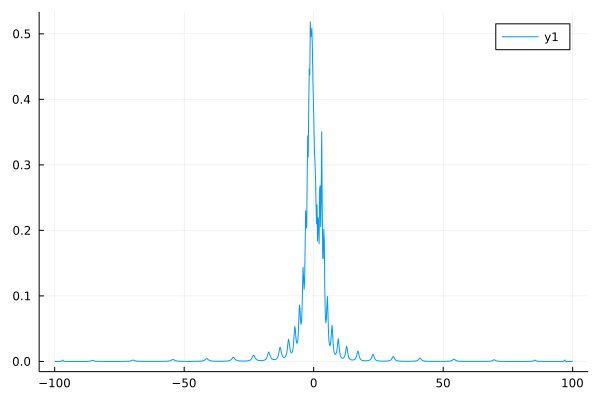

In [14]:
plot(real.(raw_reals.freq), imag.(raw_reals.val))
#plot!(omegas, rho.(omegas))

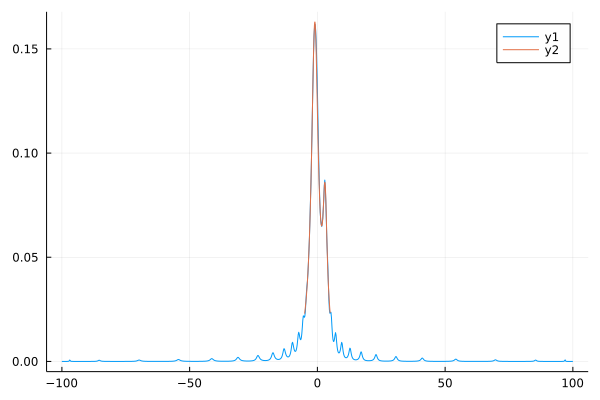

In [21]:
plot()
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val))/pi)
plot!(omegas, rho.(omegas))
#savefig("picture.png")

In [16]:
#=
mesh = 1024
myx = 40*(collect(1:mesh) .- mesh/2) ./ mesh
myy = 20*(collect(1:mesh) .- 1) ./ mesh
hardy_plot = Array{Complex{BigFloat}}(undef, mesh, mesh) 
for i in 1:mesh
    for j in 1:mesh
        hardy_plot[j,i] = hardy_basis(myx[j],myy[i],20)
    end
end
plt.figure(figsize=(3.7,1.5))
#plt.pcolormesh(myx, myy, real.(hardy_basis.(myx,myy,1)'), shading="auto")
plt.pcolormesh(myx, myy, Float64.(real.(hardy_plot')))
#plt.pcolormesh(myx, myy, Float64.(imag.(conj.(hardy_plot)')))
ax = plt.gca()
ax.set_xlim([-20,20])
ax.set_ylim([0,1])
#ax.set_aspect("equal")
plt.colorbar()
plt.show()
=#

In [17]:
#=
f = open( "in_green.dat", "w")
for iw in 1:hnw
    IR_basis_set.smpl_wn_f.sampling_points[hnw+iw]
    omega = IR_basis_set.smpl_wn_f.sampling_points[hnw+iw]*pi/beta
    green = gw[hnw+iw]
    println(f, "$omega \t $(real(green)) \t $(imag(green))")
end
close(f)
g = open( "input.txt", "w")
    println(g,"in_green.dat \t $hnw \tout_spec.dat")
close(g)
=#
#=
f = open("in_green.dat", "r")
for i in 1:hnw
    list = readline(f)
    s  = split(list,'\t')
    o  = parse(BigFloat, s[1])
    re = parse(BigFloat, s[2])
    ii = parse(BigFloat, s[3])
    test_smpl[i] = o
    test_gw[i]   = re + ii*im
end
close(f)
=#